# Categorical features - data wrangling, EDA, feature engineering
    
* [1 Missing values](#1_nulls)
* [2 Unique values](#2_uniques)
* [3 Feature engineering](#3_fi)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('mode.chained_assignment', None)
#https://www.dataquest.io/blog/settingwithcopywarning/

In [2]:
df_all = pd.read_csv("./train.csv",index_col='ID',na_values=['NaN','nan'],low_memory=False)
dt_all = pd.read_csv("./test.csv" ,index_col='ID',na_values=['NaN','nan'],low_memory=False)

In [3]:
y = df_all['target']

In [4]:
dfc = df_all.select_dtypes(include='object')
dfc.shape

(145231, 51)

In [5]:
dtc = dt_all.select_dtypes(include='object')
dtc.shape

(145232, 51)

Rename the columns

In [6]:
cols_orig = dfc.columns
cols = []

for i in range(len(cols_orig)):
    cols.append("C-" + str(i))
  
dfc.columns = cols
dtc.columns = cols

for n, o in zip(cols,cols_orig):
    print(n,'---',o)

C-0 --- VAR_0001
C-1 --- VAR_0005
C-2 --- VAR_0008
C-3 --- VAR_0009
C-4 --- VAR_0010
C-5 --- VAR_0011
C-6 --- VAR_0012
C-7 --- VAR_0043
C-8 --- VAR_0044
C-9 --- VAR_0073
C-10 --- VAR_0075
C-11 --- VAR_0156
C-12 --- VAR_0157
C-13 --- VAR_0158
C-14 --- VAR_0159
C-15 --- VAR_0166
C-16 --- VAR_0167
C-17 --- VAR_0168
C-18 --- VAR_0169
C-19 --- VAR_0176
C-20 --- VAR_0177
C-21 --- VAR_0178
C-22 --- VAR_0179
C-23 --- VAR_0196
C-24 --- VAR_0200
C-25 --- VAR_0202
C-26 --- VAR_0204
C-27 --- VAR_0214
C-28 --- VAR_0216
C-29 --- VAR_0217
C-30 --- VAR_0222
C-31 --- VAR_0226
C-32 --- VAR_0229
C-33 --- VAR_0230
C-34 --- VAR_0232
C-35 --- VAR_0236
C-36 --- VAR_0237
C-37 --- VAR_0239
C-38 --- VAR_0274
C-39 --- VAR_0283
C-40 --- VAR_0305
C-41 --- VAR_0325
C-42 --- VAR_0342
C-43 --- VAR_0352
C-44 --- VAR_0353
C-45 --- VAR_0354
C-46 --- VAR_0404
C-47 --- VAR_0466
C-48 --- VAR_0467
C-49 --- VAR_0493
C-50 --- VAR_1934


Since there are only 51 variables, let's have a look at the first 5 non-zero rows of all of them. Let's show them in separate cells so that we don't have to scroll the cell to see all the entries. Can we do some early guesses at this stage?

In [7]:
dfc.iloc[:,0:14].dropna().head()

,C-0,C-1,C-2,C-3,C-4,C-5,C-6,C-7,C-8,C-9,C-10,C-11,C-12,C-13
ID,,,,,,,,,,,,,,
166,R,N,False,False,False,False,False,False,[],11SEP12:00:00:00,24SEP10:00:00:00,02AUG11:00:00:00,05JUL12:00:00:00,31JAN12:00:00:00
249,R,C,False,False,False,False,False,False,[],01OCT12:00:00:00,02NOV09:00:00:00,05MAY11:00:00:00,05JUN11:00:00:00,01MAR12:00:00:00
604,R,B,False,False,False,False,False,False,[],22JUN12:00:00:00,09NOV11:00:00:00,09NOV11:00:00:00,26MAY12:00:00:00,22FEB12:00:00:00
886,R,N,False,False,False,False,False,False,[],12JUN12:00:00:00,01APR09:00:00:00,01JAN12:00:00:00,16JUN12:00:00:00,29FEB12:00:00:00
3062,H,B,False,False,False,False,False,False,[],07MAR12:00:00:00,06SEP10:00:00:00,12OCT11:00:00:00,09MAR12:00:00:00,02MAR12:00:00:00


In [8]:
dfc.iloc[:,14:22].dropna().head()

,C-14,C-15,C-16,C-17,C-18,C-19,C-20,C-21
ID,,,,,,,,
249,02FEB12:00:00:00,05APR10:00:00:00,21MAY12:00:00:00,20APR11:00:00:00,13APR12:00:00:00,05APR10:00:00:00,21MAY12:00:00:00,01MAR12:00:00:00
1682,19JUN12:00:00:00,14JUL11:00:00:00,04JAN12:00:00:00,29JUL11:00:00:00,06DEC11:00:00:00,14JUL11:00:00:00,04JAN12:00:00:00,29JUL11:00:00:00
2778,09JUL12:00:00:00,28APR08:00:00:00,03AUG12:00:00:00,02JUL12:00:00:00,10JUL12:00:00:00,28APR08:00:00:00,09AUG12:00:00:00,02JUL12:00:00:00
4805,03OCT12:00:00:00,15NOV10:00:00:00,05JUL11:00:00:00,01JUN11:00:00:00,01JUN11:00:00:00,15NOV10:00:00:00,05JUL11:00:00:00,01JUN11:00:00:00
6296,21DEC11:00:00:00,10SEP07:00:00:00,29MAY12:00:00:00,29JUN11:00:00:00,02APR12:00:00:00,10SEP07:00:00:00,29MAY12:00:00:00,24FEB12:00:00:00


In [9]:
dfc.iloc[:,22:34].dropna().head()

,C-22,C-23,C-24,C-25,C-26,C-27,C-28,C-29,C-30,C-31,C-32,C-33
ID,,,,,,,,,,,,
87489,13APR12:00:00:00,False,BATON ROUGE,BatchInquiry,30JAN14:21:09:00,HRE-Social Security Number-1373,DS,19APR12:02:00:00,C6,False,False,False
113977,23FEB10:00:00:00,False,GREENVILLE,BatchInquiry,30JAN14:23:20:00,HRE-Social Security Number-1747,DS,24MAY12:02:00:00,C6,False,False,False
123414,14APR12:00:00:00,False,MONTGOMERY,BatchInquiry,30JAN14:21:19:00,HRE-Social Security Number-1397,DS,20APR12:02:00:00,C6,False,False,False
127147,03OCT11:00:00:00,False,ALTAMONTE SPRINGS,BatchInquiry,29JAN14:19:55:00,HRE-Social Security Number-15335,DS,24OCT11:02:00:00,C6,False,False,False


In [10]:
dfc.iloc[:,34:51].dropna().head()

,C-34,C-35,C-36,C-37,C-38,C-39,C-40,C-41,C-42,C-43,C-44,C-45,C-46,C-47,C-48,C-49,C-50
ID,,,,,,,,,,,,,,,,,
2,True,True,FL,False,FL,S,S,-1,CF,O,U,O,CHIEF EXECUTIVE OFFICER,-1,-1,COMMUNITY ASSOCIATION MANAGER,IAPS
4,False,True,CA,False,MI,S,S,H,EC,O,R,R,-1,I,Discharged,-1,IAPS
5,True,True,WV,False,WV,S,P,R,UU,R,R,-1,-1,-1,-1,-1,IAPS
7,False,True,TX,False,TX,S,P,H,-1,R,R,-1,-1,-1,-1,-1,RCC
8,True,True,IL,False,IL,S,P,S,-1,R,U,O,-1,-1,-1,-1,BRANCH


Let's also print for each column the number of missing values (NaN) and unique fileds (NaN included):

In [11]:
df_stats = pd.concat((dfc.isna().sum(),dfc.nunique(dropna=False)),axis=1)
dt_stats = pd.concat((dtc.isna().sum(),dtc.nunique(dropna=False)),axis=1)

tmp = dfc.nunique()
tmp.iloc[:] = "|"

stats = pd.concat((df_stats,tmp,dt_stats),axis=1)

stats.columns=['n_missing','n_unique','|','n_missing_test','n_unique_test']

sort_by = 'n_missing'
#sort_by = 'n_unique'

print(stats.sort_values(by=sort_by))

      n_missing  n_unique  |  n_missing_test  n_unique_test
C-0           0         3  |               0              3
C-50          0         5  |               0              5
C-1           0         4  |               0              4
C-2          56         2  |              48              2
C-37         56         2  |              48              2
C-36         56        46  |              48             46
C-35         56         3  |              48              3
C-34         56         3  |              48              3
C-33         56         3  |              48              3
C-32         56         2  |              48              2
C-31         56         3  |              48              3
C-30         56         2  |              48              2
C-29         56       398  |              48            398
C-28         56         2  |              48              2
C-23         56         2  |              48              2
C-26         56      1193  |            

In [12]:
# make a copy of a the dataset to control the features (left to be engineered)

left = dfc.head(3)

print(left.shape[1],"features left:\n",left.columns.values)

51 features left:
 ['C-0' 'C-1' 'C-2' 'C-3' 'C-4' 'C-5' 'C-6' 'C-7' 'C-8' 'C-9' 'C-10' 'C-11'
 'C-12' 'C-13' 'C-14' 'C-15' 'C-16' 'C-17' 'C-18' 'C-19' 'C-20' 'C-21'
 'C-22' 'C-23' 'C-24' 'C-25' 'C-26' 'C-27' 'C-28' 'C-29' 'C-30' 'C-31'
 'C-32' 'C-33' 'C-34' 'C-35' 'C-36' 'C-37' 'C-38' 'C-39' 'C-40' 'C-41'
 'C-42' 'C-43' 'C-44' 'C-45' 'C-46' 'C-47' 'C-48' 'C-49' 'C-50']


In [13]:
#check '-1'

In [14]:
dfc.isin([-1,'-1']).sum(axis=0)

C-0          0
C-1          0
C-2          0
C-3          0
C-4          0
C-5          0
C-6          0
C-7          0
C-8          0
C-9          0
C-10         0
C-11         0
C-12         0
C-13         0
C-14         0
C-15         0
C-16         0
C-17         0
C-18         0
C-19         0
C-20         0
C-21         0
C-22         0
C-23         0
C-24         0
C-25         0
C-26         0
C-27         0
C-28         0
C-29         0
C-30         0
C-31         0
C-32         0
C-33         0
C-34         0
C-35         0
C-36         0
C-37         0
C-38       327
C-39      4960
C-40      2907
C-41     13574
C-42     30969
C-43      2521
C-44      5944
C-45     23643
C-46    130443
C-47    121461
C-48    121675
C-49    135182
C-50         0
dtype: int64

In [15]:
sel = stats['n_missing'] == 0

cols_0 = list(stats[sel].index)

print(cols_0)

['C-0', 'C-1', 'C-50']


In [16]:
# prepare the datasets t for model training/testing and v for model evaluation

t = dfc[cols_0]
v = dtc[cols_0]

In [17]:
for col in cols_0:

    vals = dfc[col].unique()

    print(col, sorted(vals))

C-0 ['H', 'Q', 'R']
C-1 ['B', 'C', 'N', 'S']
C-50 ['BRANCH', 'CSC', 'IAPS', 'MOBILE', 'RCC']


In [18]:
from sklearn.preprocessing import LabelEncoder

for col in cols_0:
    
    le = LabelEncoder()

    le.fit(list(t[col].values) + list(v[col].values))
    
    t[col] = le.transform(t[col])
    v[col] = le.transform(v[col])
    
for c in t.columns:

    print(c,':',sorted(t[c].unique()))

C-0 : [0, 1, 2]
C-1 : [0, 1, 2, 3]
C-50 : [0, 1, 2, 3, 4]


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score

In [20]:
X_train, X_test, y_train, y_test = train_test_split(t, y, test_size=0.25, random_state=111)

rf = RandomForestClassifier(random_state=222)
rf.get_params()

param_grid = {'n_estimators': [100],
              'max_depth': [10],
#              'bootstrap': [True, False]
             }

rf_cv = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter = 100,
                               scoring='roc_auc', cv = 5, verbose=2, n_jobs = -1, random_state=333)
#                               scoring='recall', cv = 5, verbose=2, n_jobs = -1, random_state=333)
rf_cv.fit(X_train,y_train)

print("Best Parameters:",rf_cv.best_params_)
print("Best Score:",round(rf_cv.best_score_,4),'\n')

y_pred = rf_cv.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['RF 0','RF 1']))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/data/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.2s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.8s finished


Best Parameters: {'n_estimators': 100, 'max_depth': 10}
Best Score: 0.6204 

              precision    recall  f1-score   support

        RF 0       0.77      1.00      0.87     27856
        RF 1       1.00      0.00      0.00      8452

    accuracy                           0.77     36308
   macro avg       0.88      0.50      0.43     36308
weighted avg       0.82      0.77      0.67     36308



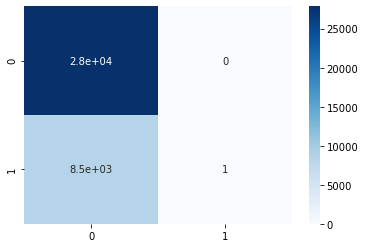

In [21]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,cmap='Blues');

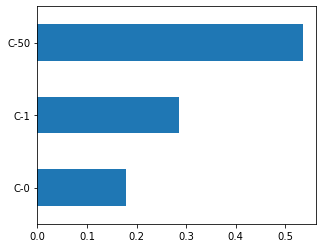

In [22]:
rf_feature_importance = pd.Series(rf_cv.best_estimator_.feature_importances_, index=t.columns)
rf_feature_importance.sort_values().plot(kind='barh',figsize=(5,4));

In [23]:
# Finished, remove cols_0 from the to-do list

left = left.drop(cols_0,axis=1)

print(left.shape[1]," features left:\n",left.columns.values)

48  features left:
 ['C-2' 'C-3' 'C-4' 'C-5' 'C-6' 'C-7' 'C-8' 'C-9' 'C-10' 'C-11' 'C-12'
 'C-13' 'C-14' 'C-15' 'C-16' 'C-17' 'C-18' 'C-19' 'C-20' 'C-21' 'C-22'
 'C-23' 'C-24' 'C-25' 'C-26' 'C-27' 'C-28' 'C-29' 'C-30' 'C-31' 'C-32'
 'C-33' 'C-34' 'C-35' 'C-36' 'C-37' 'C-38' 'C-39' 'C-40' 'C-41' 'C-42'
 'C-43' 'C-44' 'C-45' 'C-46' 'C-47' 'C-48' 'C-49']


In [24]:
# now the 56 missing

In [25]:
sel56 = stats['n_missing'] == 56

cols56 = list(stats[sel56].index)

pd.set_option('display.max_columns', None)
dfc[cols56].dropna().head()

,C-2,C-3,C-4,C-5,C-6,C-7,C-8,C-10,C-23,C-25,C-26,C-28,C-29,C-30,C-31,C-32,C-33,C-34,C-35,C-36,C-37
ID,,,,,,,,,,,,,,,,,,,,,
2,False,False,False,False,False,False,[],08NOV11:00:00:00,False,BatchInquiry,29JAN14:21:16:00,DS,08NOV11:02:00:00,C6,False,False,False,True,True,FL,False
4,False,False,False,False,False,False,[],10NOV11:00:00:00,False,BatchInquiry,01FEB14:00:11:00,DS,02OCT12:02:00:00,C6,False,False,False,False,True,CA,False
5,False,False,False,False,False,False,[],13DEC11:00:00:00,False,BatchInquiry,30JAN14:15:11:00,DS,13DEC11:02:00:00,C6,False,False,False,True,True,WV,False
7,False,False,False,False,False,False,[],23SEP10:00:00:00,False,BatchInquiry,01FEB14:00:07:00,DS,01NOV12:02:00:00,C6,False,False,False,False,True,TX,False
8,False,False,False,False,False,False,[],15OCT11:00:00:00,False,BatchInquiry,29JAN14:19:31:00,DS,15OCT11:02:00:00,C6,False,False,False,True,True,IL,False


In [26]:
nans = dfc['C-2'].isna()

dfc[cols56][nans]

,C-2,C-3,C-4,C-5,C-6,C-7,C-8,C-10,C-23,C-25,C-26,C-28,C-29,C-30,C-31,C-32,C-33,C-34,C-35,C-36,C-37
ID,,,,,,,,,,,,,,,,,,,,,
19557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
nans56 = dfc[cols56].nunique(dropna=False).sort_values()
nans56

C-2        2
C-32       2
C-30       2
C-28       2
C-25       2
C-23       2
C-37       2
C-7        2
C-6        2
C-5        2
C-4        2
C-3        2
C-8        2
C-31       3
C-33       3
C-34       3
C-35       3
C-36      46
C-29     398
C-26    1193
C-10    2372
dtype: int64

In [28]:
cols_1 = nans56[nans56 ==2].index

for col in cols_1:
    
    vals = dfc[col].unique()

    print(col, vals)

C-2 [False nan]
C-32 [False nan]
C-30 ['C6' nan]
C-28 ['DS' nan]
C-25 ['BatchInquiry' nan]
C-23 [False nan]
C-37 [False nan]
C-7 [False nan]
C-6 [False nan]
C-5 [False nan]
C-4 [False nan]
C-3 [False nan]
C-8 ['[]' nan]


In [29]:
y[nans].value_counts(normalize=True)

0    0.767857
1    0.232143
Name: target, dtype: float64

In [30]:
y[dfc['C-2'].isna()].value_counts(normalize=True)

0    0.767857
1    0.232143
Name: target, dtype: float64

All the 13 features are fully correlated,the same 56 rows are filled with a "NaN" value. The remaining (145k!) rows have the same single value for each column (either "False" or "[]" or "BatchInquiry" or "DS" or "C6"). Moreover, in those 56 rows, the target variable is equal to 1 for 23\% of rows, similar;y to the overall sample, so we don't expect any impact from those row on the model's classification power. They could be fully removed. Neverthemess, we will reduce all these 13 columns to just one, in wich the "NaN" value in 56 rows will be replaced by 1, while the remining rows will be set to 0.

In [31]:
dfc['C-2'] = dfc['C-2'].replace(False,1)
dfc['C-2'] = dfc['C-2'].fillna(0)

dfc['C-2'].value_counts(dropna=False)

1.0    145175
0.0        56
Name: C-2, dtype: int64

In [32]:
dtc['C-2'] = dtc['C-2'].replace(False,1)
dtc['C-2'] = dtc['C-2'].fillna(0)

dtc['C-2'].value_counts(dropna=False)

1.0    145184
0.0        48
Name: C-2, dtype: int64

In [33]:
t['C-2'] = dfc['C-2']
v['C-2'] = dtc['C-2']

# Finished, remove cols_1 from the to-do list
left = left.drop(cols_1,axis=1)

print(left.shape[1]," features left:\n",left.columns.values)

35  features left:
 ['C-9' 'C-10' 'C-11' 'C-12' 'C-13' 'C-14' 'C-15' 'C-16' 'C-17' 'C-18'
 'C-19' 'C-20' 'C-21' 'C-22' 'C-24' 'C-26' 'C-27' 'C-29' 'C-31' 'C-33'
 'C-34' 'C-35' 'C-36' 'C-38' 'C-39' 'C-40' 'C-41' 'C-42' 'C-43' 'C-44'
 'C-45' 'C-46' 'C-47' 'C-48' 'C-49']


In [34]:
cols_2 = nans56[nans56 ==3].index

for col in cols_2:
    
    vals = dfc[col].unique()

    print(col, vals)

C-31 [False True nan]
C-33 [False True nan]
C-34 [True False nan]
C-35 [True False nan]


Let's check if they are repeated columns:

In [35]:
dfc[cols_2].mean()

C-31    0.003251
C-33    0.001178
C-34    0.565648
C-35    0.997754
dtype: float64

The average is different for each of the columns, so none of the columns are repeated. Let's convert them to integers and save to the final dataset.

In [36]:
for col in cols_2:
    
    t[col] = dfc[col]
    v[col] = dtc[col]
    
    t[col] = t[col].replace(True,2)
    t[col] = t[col].replace(False,1)
    t[col] = t[col].fillna(0)
    
    v[col] = v[col].replace(True,2)
    v[col] = v[col].replace(False,1)
    v[col] = v[col].fillna(0)
    
for col in cols_2:
    print(t[col].value_counts())

1.0    144703
2.0       472
0.0        56
Name: C-31, dtype: int64
1.0    145004
2.0       171
0.0        56
Name: C-33, dtype: int64
2.0    82118
1.0    63057
0.0       56
Name: C-34, dtype: int64
2.0    144849
1.0       326
0.0        56
Name: C-35, dtype: int64


In [37]:
# Finished, remove cols_2 from the to-do list
left = left.drop(cols_2,axis=1)

print(left.shape[1]," features left:\n",left.columns.values)

31  features left:
 ['C-9' 'C-10' 'C-11' 'C-12' 'C-13' 'C-14' 'C-15' 'C-16' 'C-17' 'C-18'
 'C-19' 'C-20' 'C-21' 'C-22' 'C-24' 'C-26' 'C-27' 'C-29' 'C-36' 'C-38'
 'C-39' 'C-40' 'C-41' 'C-42' 'C-43' 'C-44' 'C-45' 'C-46' 'C-47' 'C-48'
 'C-49']


In [38]:
dfc['C-47'].isna().sum()

918

In [39]:
stats[(stats.index.isin(left.columns)) & (stats['n_missing'] == 56)].sort_values(by='n_unique')

,n_missing,n_unique,|,n_missing_test,n_unique_test
C-36,56,46,|,48,46
C-29,56,398,|,48,398
C-26,56,1193,|,48,1191
C-10,56,2372,|,48,2370


In [40]:
stats[(stats.index.isin(left.columns)) & (stats['n_missing'] == 918)].sort_values(by='n_unique')

,n_missing,n_unique,|,n_missing_test,n_unique_test
C-47,918,3,|,909,3
C-43,918,5,|,909,5
C-44,918,5,|,909,5
C-45,918,5,|,909,5
C-48,918,5,|,909,5
C-39,918,8,|,909,9
C-40,918,9,|,909,9
C-41,918,10,|,909,10
C-42,918,51,|,909,51
C-38,918,58,|,909,58


In [41]:
col = 'C-47'

print(dfc[col].unique())
print(dtc[col].unique())

['-1' 'I' nan]
['-1' 'I' nan]


In [42]:
t[col] = dfc[col]
v[col] = dtc[col]
    
t[col] = t[col].replace('I',2)
t[col] = t[col].replace('-1',1)
t[col] = t[col].fillna(0)
    
v[col] = v[col].replace('I',2)
v[col] = v[col].replace('-1',1)
v[col] = v[col].fillna(0)

print(t[col].unique())

# Finished, remove cols_2 from the to-do list
left = left.drop(col,axis=1)

print(left.shape[1]," features left:\n",left.columns.values)

[1. 2. 0.]
30  features left:
 ['C-9' 'C-10' 'C-11' 'C-12' 'C-13' 'C-14' 'C-15' 'C-16' 'C-17' 'C-18'
 'C-19' 'C-20' 'C-21' 'C-22' 'C-24' 'C-26' 'C-27' 'C-29' 'C-36' 'C-38'
 'C-39' 'C-40' 'C-41' 'C-42' 'C-43' 'C-44' 'C-45' 'C-46' 'C-48' 'C-49']


In [43]:
stats[(stats.index.isin(left.columns)) & (stats['n_missing'] == 918)].sort_values(by='n_unique')

,n_missing,n_unique,|,n_missing_test,n_unique_test
C-43,918,5,|,909,5
C-44,918,5,|,909,5
C-45,918,5,|,909,5
C-48,918,5,|,909,5
C-39,918,8,|,909,9
C-40,918,9,|,909,9
C-41,918,10,|,909,10
C-42,918,51,|,909,51
C-38,918,58,|,909,58
C-49,918,609,|,909,620


In [44]:
cols_4 = ['C-43','C-44','C-45','C-48']

for col in cols_4:
    print(col,dfc[col].unique())
    
for col in cols_4:
    print(col,dtc[col].unique())

C-43 ['O' 'R' 'U' '-1' nan]
C-44 ['U' 'R' 'O' '-1' nan]
C-45 ['O' 'R' '-1' 'U' nan]
C-48 ['-1' 'Discharged' 'Dismissed' nan 'Discharge NA']
C-43 ['U' 'O' '-1' nan 'R']
C-44 ['U' 'R' '-1' 'O' nan]
C-45 ['R' 'U' '-1' 'O' nan]
C-48 ['-1' 'Discharged' nan 'Dismissed' 'Discharge NA']


In [45]:
t[cols_4] = dfc[cols_4]
v[cols_4] = dtc[cols_4]

t[cols_4] = t[cols_4].fillna('-0.5')
v[cols_4] = v[cols_4].fillna('-0.5')

In [46]:
# 'C-43','C-44','C-45'

vals = t[cols_4[0]].unique().tolist()
print(vals)

le = LabelEncoder().fit(vals)

for col in cols_4[:-1]:
    t[col] = le.transform(t[col])
    v[col] = le.transform(v[col])

vals_new = t[cols_4[0]].unique().tolist()
print(vals_new)
    
pairs = []

for a, b in zip(vals,vals_new):
    pairs.append((a,b))
        
print(sorted(set(pairs)),"\n")

['O', 'R', 'U', '-1', '-0.5']
[2, 3, 4, 1, 0]
[('-0.5', 0), ('-1', 1), ('O', 2), ('R', 3), ('U', 4)] 



In [47]:
# C-48

col = cols_4[3]

vals = t[col].unique().tolist()

le = LabelEncoder().fit(vals)
    
t[col] = le.transform(t[col])
v[col] = le.transform(v[col])

vals_new = t[col].unique().tolist()
    
pairs = []

for a, b in zip(vals,vals_new):
    pairs.append((a,b))
        
print(sorted(set(pairs)),"\n")

[('-0.5', 0), ('-1', 1), ('Discharge NA', 2), ('Discharged', 3), ('Dismissed', 4)] 



In [48]:
# Finished, remove cols_2 from the to-do list
left = left.drop(cols_4,axis=1)

print(left.shape[1]," features left:\n",left.columns.values)

26  features left:
 ['C-9' 'C-10' 'C-11' 'C-12' 'C-13' 'C-14' 'C-15' 'C-16' 'C-17' 'C-18'
 'C-19' 'C-20' 'C-21' 'C-22' 'C-24' 'C-26' 'C-27' 'C-29' 'C-36' 'C-38'
 'C-39' 'C-40' 'C-41' 'C-42' 'C-46' 'C-49']


In [49]:
sel918 = stats['n_missing'] == 918

cols918 = list(stats[sel918].index)

pd.concat((dfc[cols918][nans],y[nans]),axis=1)

,C-38,C-39,C-40,C-41,C-42,C-43,C-44,C-45,C-46,C-47,C-48,C-49,target
ID,,,,,,,,,,,,,
19557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
23643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
25823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
26606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
32800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
34703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
40755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
51095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
54627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [50]:
dfc[nans]

,C-0,C-1,C-2,C-3,C-4,C-5,C-6,C-7,C-8,C-9,C-10,C-11,C-12,C-13,C-14,C-15,C-16,C-17,C-18,C-19,C-20,C-21,C-22,C-23,C-24,C-25,C-26,C-27,C-28,C-29,C-30,C-31,C-32,C-33,C-34,C-35,C-36,C-37,C-38,C-39,C-40,C-41,C-42,C-43,C-44,C-45,C-46,C-47,C-48,C-49,C-50
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19557,R,S,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BRANCH
23643,R,B,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BRANCH
25823,H,B,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IAPS
26606,R,B,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BRANCH
32800,H,C,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IAPS
34703,H,B,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IAPS
40755,H,B,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BRANCH
51095,R,C,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IAPS
54627,R,B,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IAPS


In [51]:
nans = dtc['C-2'].isna()

dtc[cols918][nans]

,C-38,C-39,C-40,C-41,C-42,C-43,C-44,C-45,C-46,C-47,C-48,C-49
ID,,,,,,,,,,,,


In [52]:
dtc[nans]

,C-0,C-1,C-2,C-3,C-4,C-5,C-6,C-7,C-8,C-9,C-10,C-11,C-12,C-13,C-14,C-15,C-16,C-17,C-18,C-19,C-20,C-21,C-22,C-23,C-24,C-25,C-26,C-27,C-28,C-29,C-30,C-31,C-32,C-33,C-34,C-35,C-36,C-37,C-38,C-39,C-40,C-41,C-42,C-43,C-44,C-45,C-46,C-47,C-48,C-49,C-50
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [53]:
cols_5 = ['C-39','C-40','C-41']

t1 = dfc[cols_5]
v1 = dtc[cols_5]

t1 = t1.fillna('-1')
v1 = v1.fillna('-1')

t1_pre = []

for c in t1.columns:
    t1_pre.append(t1[c].value_counts(normalize=True))
    
vals = []

#list(t0[col].values) + list(v0[col].values)

for col in cols_5:
    vals.extend(list(t1[col].values))
    vals.extend(list(v1[col].values))
    vals = list(set(vals))

#print(vals)

le = LabelEncoder().fit(vals)

for col in cols_5:
    t1[col] = le.transform(t1[col])
    v1[col] = le.transform(v1[col])

pairs = []
for i,c in enumerate(t1.columns):
    
    before = t1_pre[i].index.tolist()
    after = t1[c].value_counts(normalize=True).index.tolist()
    
    for a, b in zip(before,after):
        pairs.append((a,b))
        
print(sorted(set(pairs)),"\n")

[('-1', 0), ('F', 1), ('G', 2), ('H', 3), ('M', 4), ('P', 5), ('R', 6), ('S', 7), ('U', 8)] 



In [54]:
# copy these 3 features to the engineered dataset

for col in cols_5:
    t[col] = t1[col]
    v[col] = v1[col]
    
print(t[col].value_counts())

# and remove them from the to-do list

left = left.drop(cols_5,axis=1)
print(left.shape[1]," features left:\n",left.columns.values)

7    89842
3    26745
0    14492
5    10988
6     2056
1      825
4      127
8      115
2       41
Name: C-41, dtype: int64
23  features left:
 ['C-9' 'C-10' 'C-11' 'C-12' 'C-13' 'C-14' 'C-15' 'C-16' 'C-17' 'C-18'
 'C-19' 'C-20' 'C-21' 'C-22' 'C-24' 'C-26' 'C-27' 'C-29' 'C-36' 'C-38'
 'C-42' 'C-46' 'C-49']


In [55]:
X_train, X_test, y_train, y_test = train_test_split(t, y, test_size=0.25, random_state=111)

rf = RandomForestClassifier(random_state=222)
rf.get_params()

#rf_cv = cross_validate(rf,X_train, y_train,scoring='roc_auc', cv = 3, verbose=2, n_jobs = -1)
#print(rf_cv)
#print("\n Test Score = ",round(np.mean(rf_cv['test_score']),3))

param_grid = {'n_estimators': [100],
              'max_depth': [10],
#              'bootstrap': [True, False]
             }
   
#rf_cv = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter = 100,
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='roc_auc', cv = 5, verbose=2, n_jobs = -1)
#                           scoring='recall', cv = 5, verbose=2, n_jobs = -1)
rf_cv.fit(X_train,y_train)

print("Best Parameters:",rf_cv.best_params_)
print("Best Score:",round(rf_cv.best_score_,4),'\n')

y_pred = rf_cv.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['RF 0','RF 1']))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.8s remaining:   10.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.2s finished


Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best Score: 0.6624 

              precision    recall  f1-score   support

        RF 0       0.77      1.00      0.87     27856
        RF 1       0.46      0.01      0.01      8452

    accuracy                           0.77     36308
   macro avg       0.62      0.50      0.44     36308
weighted avg       0.70      0.77      0.67     36308



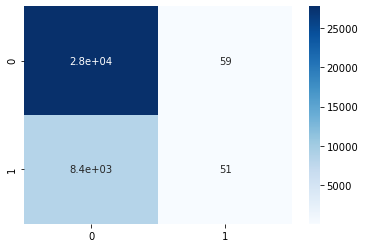

In [56]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,cmap='Blues');

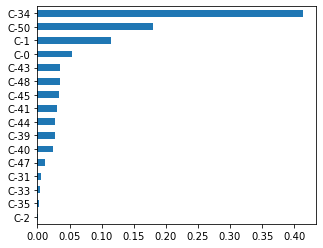

In [57]:
rf_feature_importance = pd.Series(rf_cv.best_estimator_.feature_importances_, index=t.columns)
rf_feature_importance.sort_values().plot(kind='barh',figsize=(5,4));

In [58]:
dfc[left.columns].head()

,C-9,C-10,C-11,C-12,C-13,C-14,C-15,C-16,C-17,C-18,C-19,C-20,C-21,C-22,C-24,C-26,C-27,C-29,C-36,C-38,C-42,C-46,C-49
ID,,,,,,,,,,,,,,,,,,,,,,,
2,NaN,08NOV11:00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FT LAUDERDALE,29JAN14:21:16:00,NaN,08NOV11:02:00:00,FL,FL,CF,CHIEF EXECUTIVE OFFICER,COMMUNITY ASSOCIATION MANAGER
4,04SEP12:00:00:00,10NOV11:00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SANTEE,01FEB14:00:11:00,NaN,02OCT12:02:00:00,CA,MI,EC,-1,-1
5,NaN,13DEC11:00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,REEDSVILLE,30JAN14:15:11:00,NaN,13DEC11:02:00:00,WV,WV,UU,-1,-1
7,NaN,23SEP10:00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIBERTY,01FEB14:00:07:00,NaN,01NOV12:02:00:00,TX,TX,-1,-1,-1
8,NaN,15OCT11:00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRANKFORT,29JAN14:19:31:00,NaN,15OCT11:02:00:00,IL,IL,-1,-1,-1


In [59]:
dfc['C-27'].value_counts(dropna=False)

NaN                                 145219
HRE-Home Phone-0779                      1
HRE-Social Security Number-10143         1
HRE-Social Security Number-15335         1
HRE-Social Security Number-1373          1
HRE-Social Security Number-18823         1
HRE-Social Security Number-1855          1
FSI-0005-1                               1
HRE-Social Security Number-1289          1
HRE-Social Security Number-2857          1
HRE-Home Phone-0621                      1
HRE-Social Security Number-1397          1
HRE-Social Security Number-1747          1
Name: C-27, dtype: int64

In [60]:
dtc['C-27'].value_counts(dropna=False)

NaN                                 145214
HRE-Social Security Number-15335         2
HRE-Social Security Number-1231          2
HRE-Social Security Number-14395         1
FSI-0003-1                               1
HRE-Social Security Number-20083         1
HRE-Social Security Number-18087         1
HRE-Social Security Number-13457         1
HRE-Social Security Number-10887         1
HRE-Social Security Number-15467         1
HRE-Home Phone-4717                      1
HRE-Social Security Number-9871          1
HRE-Social Security Number-2857          1
HRE-Social Security Number-1453          1
HRE-Social Security Number-1011          1
HRE-Social Security Number-2801          1
HRE-Social Security Number-1397          1
Name: C-27, dtype: int64

In [61]:
col = 'C-27'

t[col] = dfc[col]
v[col] = dtc[col]

vals = t[col].dropna().unique().tolist()
vals.extend(v[col].dropna().unique().tolist())
vals

for val in vals:
    t[col] = t[col].replace(val,1)
    v[col] = v[col].replace(val,1)

t[col] = t[col].fillna(0)
v[col] = v[col].fillna(0)

print(t[col].unique())

# Finished, remove it from the to-do list
left = left.drop(col,axis=1)

print(left.shape[1]," features left:\n",left.columns.values)

[0. 1.]
22  features left:
 ['C-9' 'C-10' 'C-11' 'C-12' 'C-13' 'C-14' 'C-15' 'C-16' 'C-17' 'C-18'
 'C-19' 'C-20' 'C-21' 'C-22' 'C-24' 'C-26' 'C-29' 'C-36' 'C-38' 'C-42'
 'C-46' 'C-49']


In [62]:
dfc['C-42'].value_counts(dropna=False)

-1     30969
FF     21262
EE     11209
FE     11171
DD     10030
EF      9365
ED      7675
FD      6674
DE      6600
DF      5330
UU      4183
CD      2140
DC      2020
CE      1757
CC      1710
EC      1629
UF      1535
UE      1013
NaN      918
FU       880
CF       807
FC       768
UD       714
EU       603
DU       430
BD       355
BC       332
BE       330
CB       295
DB       255
AD       249
EB       220
BB       194
AE       186
AC       151
AF       148
EA       138
BF       127
UC       123
CA       114
DA       111
AA       104
FB        87
CU        87
AB        80
FA        69
BA        47
BU        14
UB         9
AU         7
UA         7
Name: C-42, dtype: int64

In [63]:
# C-42

col = 'C-42'

t[col] = dfc[col]
v[col] = dtc[col]

t[col] = t[col].fillna('-0.5')
v[col] = v[col].fillna('-0.5')

vals_old = t[col].unique().tolist()

vals = list(set(list(t[col].values) + list(v[col].values)))
print(vals)

le = LabelEncoder().fit(vals)
    
t[col] = le.transform(t[col])
v[col] = le.transform(v[col])

vals_new = t[col].unique().tolist()
    
pairs = []

for a, b in zip(vals_old,vals_new):
    pairs.append((a,b))
        
print(sorted(set(pairs)),"\n")


# Finished, remove it from the to-do list
left = left.drop(col,axis=1)

print(left.shape[1]," features left:\n",left.columns.values)

['UF', 'DE', 'AB', 'CU', 'FF', 'CC', 'BB', 'BU', 'FA', 'BD', 'DF', 'DA', 'CD', 'FC', 'CB', 'FE', '-0.5', 'AC', 'DC', 'FU', 'BF', 'UU', 'AD', 'BA', 'FD', 'EB', 'DD', 'AU', 'DU', 'ED', 'UA', 'BC', 'AF', 'UC', 'CE', 'EE', 'UB', '-1', 'FB', 'EC', 'DB', 'UE', 'CA', 'EU', 'UD', 'AA', 'EA', 'AE', 'BE', 'EF', 'CF']
[('-0.5', 0), ('-1', 1), ('AA', 2), ('AB', 3), ('AC', 4), ('AD', 5), ('AE', 6), ('AF', 7), ('AU', 8), ('BA', 9), ('BB', 10), ('BC', 11), ('BD', 12), ('BE', 13), ('BF', 14), ('BU', 15), ('CA', 16), ('CB', 17), ('CC', 18), ('CD', 19), ('CE', 20), ('CF', 21), ('CU', 22), ('DA', 23), ('DB', 24), ('DC', 25), ('DD', 26), ('DE', 27), ('DF', 28), ('DU', 29), ('EA', 30), ('EB', 31), ('EC', 32), ('ED', 33), ('EE', 34), ('EF', 35), ('EU', 36), ('FA', 37), ('FB', 38), ('FC', 39), ('FD', 40), ('FE', 41), ('FF', 42), ('FU', 43), ('UA', 44), ('UB', 45), ('UC', 46), ('UD', 47), ('UE', 48), ('UF', 49), ('UU', 50)] 

21  features left:
 ['C-9' 'C-10' 'C-11' 'C-12' 'C-13' 'C-14' 'C-15' 'C-16' 'C-17' '

In [64]:
X_train, X_test, y_train, y_test = train_test_split(t, y, test_size=0.25, random_state=111)

rf = RandomForestClassifier(random_state=222)
rf.get_params()

#rf_cv = cross_validate(rf,X_train, y_train,scoring='roc_auc', cv = 3, verbose=2, n_jobs = -1)
#print(rf_cv)
#print("\n Test Score = ",round(np.mean(rf_cv['test_score']),3))

param_grid = {'n_estimators': [100],
              'max_depth': [10],
#              'bootstrap': [True, False]
             }
   
#rf_cv = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter = 100,
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='roc_auc', cv = 5, verbose=2, n_jobs = -1)
#                           scoring='recall', cv = 5, verbose=2, n_jobs = -1)
rf_cv.fit(X_train,y_train)

print("Best Parameters:",rf_cv.best_params_)
print("Best Score:",round(rf_cv.best_score_,4),'\n')

y_pred = rf_cv.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['RF 0','RF 1']))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.8s remaining:   10.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.2s finished


Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best Score: 0.6627 

              precision    recall  f1-score   support

        RF 0       0.77      1.00      0.87     27856
        RF 1       0.50      0.00      0.01      8452

    accuracy                           0.77     36308
   macro avg       0.63      0.50      0.44     36308
weighted avg       0.71      0.77      0.67     36308



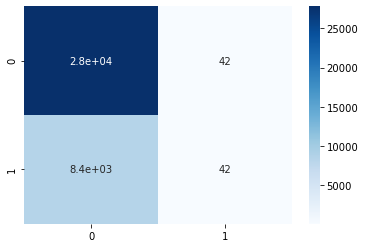

In [65]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,cmap='Blues');

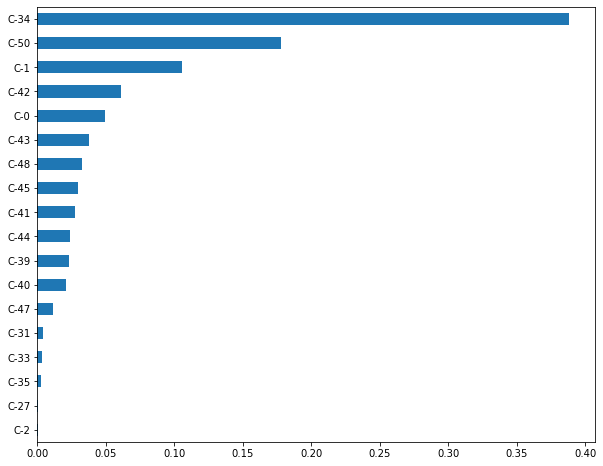

In [66]:
rf_feature_importance = pd.Series(rf_cv.best_estimator_.feature_importances_, index=t.columns)
rf_feature_importance.sort_values().plot(kind='barh',figsize=(10,8));

In [67]:
t.head()

,C-0,C-1,C-50,C-2,C-31,C-33,C-34,C-35,C-47,C-43,C-44,C-45,C-48,C-39,C-40,C-41,C-27,C-42
ID,,,,,,,,,,,,,,,,,,
2,0,1,2,1.0,1.0,1.0,2.0,2.0,1.0,2,4,2,1,7,7,0,0.0,21
4,0,0,2,1.0,1.0,1.0,1.0,2.0,2.0,2,3,3,3,7,7,3,0.0,32
5,0,1,2,1.0,1.0,1.0,2.0,2.0,1.0,3,3,1,1,7,5,6,0.0,50
7,0,1,4,1.0,1.0,1.0,1.0,2.0,1.0,3,3,1,1,7,5,3,0.0,1
8,2,2,0,1.0,1.0,1.0,2.0,2.0,1.0,3,4,2,1,7,5,7,0.0,1


In [68]:
dfc[left.columns].dropna().head()

,C-9,C-10,C-11,C-12,C-13,C-14,C-15,C-16,C-17,C-18,C-19,C-20,C-21,C-22,C-24,C-26,C-29,C-36,C-38,C-46,C-49
ID,,,,,,,,,,,,,,,,,,,,,
249,01OCT12:00:00:00,02NOV09:00:00:00,05MAY11:00:00:00,05JUN11:00:00:00,01MAR12:00:00:00,02FEB12:00:00:00,05APR10:00:00:00,21MAY12:00:00:00,20APR11:00:00:00,13APR12:00:00:00,05APR10:00:00:00,21MAY12:00:00:00,01MAR12:00:00:00,13APR12:00:00:00,BEAVERTON,01FEB14:00:16:00,03OCT12:02:00:00,OR,OR,CONTACT,-1
17628,26FEB12:00:00:00,02SEP11:00:00:00,02SEP11:00:00:00,08MAR12:00:00:00,12DEC11:00:00:00,25JAN12:00:00:00,02SEP11:00:00:00,08MAR12:00:00:00,15DEC11:00:00:00,13FEB12:00:00:00,02SEP11:00:00:00,08MAR12:00:00:00,15DEC11:00:00:00,13FEB12:00:00:00,SAINT MARYS,30JAN14:22:44:00,11MAY12:02:00:00,GA,NY,-1,-1
23801,07AUG12:00:00:00,20JUL10:00:00:00,01DEC10:00:00:00,29APR11:00:00:00,04FEB11:00:00:00,07FEB11:00:00:00,01DEC10:00:00:00,14MAY11:00:00:00,15APR11:00:00:00,15APR11:00:00:00,01DEC10:00:00:00,14MAY11:00:00:00,15APR11:00:00:00,15APR11:00:00:00,DALY CITY,01FEB14:01:02:00,23OCT12:02:00:00,CA,CA,-1,-1
31786,28FEB12:00:00:00,14DEC10:00:00:00,10OCT11:00:00:00,11FEB12:00:00:00,06JAN12:00:00:00,26JAN12:00:00:00,06JUN11:00:00:00,07FEB12:00:00:00,23DEC11:00:00:00,08DEC11:00:00:00,06JUN11:00:00:00,11FEB12:00:00:00,06JAN12:00:00:00,26JAN12:00:00:00,KILLEEN,30JAN14:22:53:00,17MAY12:02:00:00,TX,TX,-1,-1
65173,27OCT12:00:00:00,07MAR09:00:00:00,21NOV11:00:00:00,10OCT12:00:00:00,27JUL12:00:00:00,31JUL12:00:00:00,10APR12:00:00:00,19OCT12:00:00:00,15JUN12:00:00:00,01OCT12:00:00:00,21NOV11:00:00:00,19OCT12:00:00:00,27JUL12:00:00:00,01OCT12:00:00:00,VALDOSTA,01FEB14:01:24:00,30OCT12:02:00:00,GA,GA,-1,-1


In [69]:
state36 = list(set(list(dfc['C-36'].unique()) + list(dtc['C-36'].unique())))
print(state36)

['ID', nan, 'DE', 'WV', 'MI', 'AK', 'OH', 'MO', 'WY', 'IN', 'SC', 'OK', 'MT', 'MN', 'CT', 'AR', 'HI', 'FL', 'IL', 'DC', 'NC', 'NY', 'KS', 'ND', 'GA', 'SD', 'IA', 'VA', 'NM', 'CO', 'TN', 'PA', 'LA', 'OR', 'WA', 'MD', 'AZ', 'UT', 'NE', 'TX', 'CA', 'NJ', 'AL', 'KY', 'WI', 'MS', 'NV']


In [70]:
state38 = list(set(list(dfc['C-38'].unique()) + list(dtc['C-38'].unique())))
print(state38)

[nan, 'ID', 'DE', 'WV', 'AK', 'OH', 'RN', 'MO', 'WY', 'SC', 'IN', 'OK', 'MN', 'MS', 'CT', 'MT', 'AR', 'HI', 'FL', 'IL', 'DC', 'NC', 'NY', 'KS', 'ND', 'GA', 'SD', 'VT', 'IA', 'ME', 'PR', 'VA', 'NM', 'CO', 'RR', 'NH', 'TN', 'PA', 'GS', 'EE', 'RI', 'LA', 'OR', '-1', 'WA', 'MD', 'AZ', 'UT', 'NE', 'TX', 'MA', 'CA', 'NJ', 'AL', 'KY', 'WI', 'MI', 'NV']


In [71]:
c = [i for i in state36 if i in state38]
print(c)
print(len(c))
# 47 out of 50 states + DC

['ID', nan, 'DE', 'WV', 'MI', 'AK', 'OH', 'MO', 'WY', 'IN', 'SC', 'OK', 'MT', 'MN', 'CT', 'AR', 'HI', 'FL', 'IL', 'DC', 'NC', 'NY', 'KS', 'ND', 'GA', 'SD', 'IA', 'VA', 'NM', 'CO', 'TN', 'PA', 'LA', 'OR', 'WA', 'MD', 'AZ', 'UT', 'NE', 'TX', 'CA', 'NJ', 'AL', 'KY', 'WI', 'MS', 'NV']
47


In [72]:
[i for i in state36 if i not in state38]

[]

In [73]:
[i for i in state38 if i not in state36]

['RN', 'VT', 'ME', 'PR', 'RR', 'NH', 'GS', 'EE', 'RI', '-1', 'MA']

In [74]:
#'RI' - Rode Island
#'VT' - Vermont
#'MA' - Massachusetts
#'NH' - New Hampshire
#'ME' - Maine

#'PR' - Puerto Rico

# EE, GS, RR, RN - ?

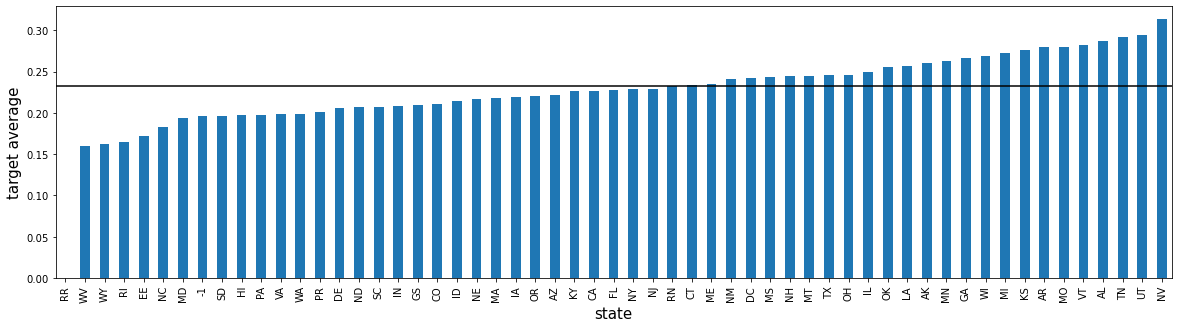

In [75]:
ds = pd.concat((dfc[['C-36','C-38']],y),axis=1)

ds.groupby('C-38')['target'].mean().sort_values().plot(kind='bar',figsize=(20,5));

plt.hlines(ds['target'].mean(),-1,60)
plt.xlabel('state',fontsize=15); plt.ylabel('target average',fontsize=15);

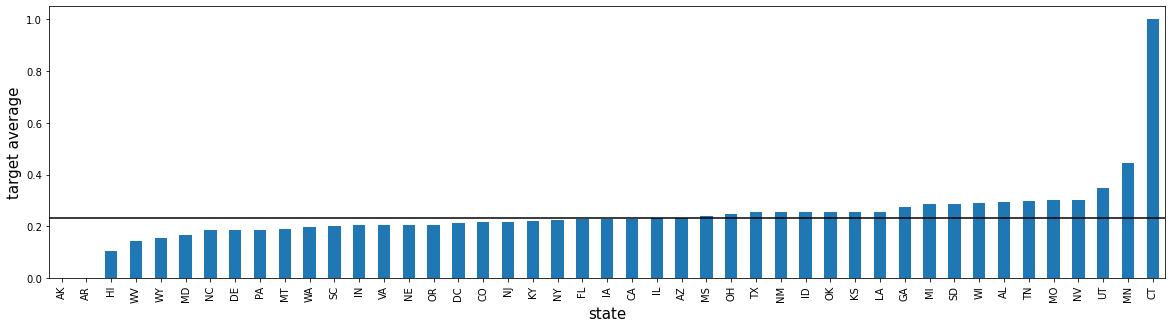

In [76]:
ds.groupby('C-36')['target'].mean().sort_values().plot(kind='bar',figsize=(20,5))

plt.hlines(ds['target'].mean(),-1,50)
plt.xlabel('state',fontsize=15); plt.ylabel('target average',fontsize=15);

fraction: 0.32144652312522803


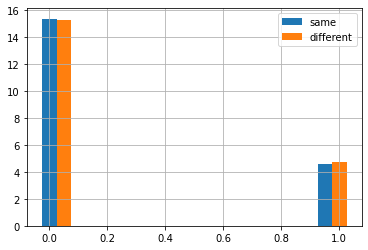

In [77]:
same = dfc['C-36'] == dfc['C-38']
print('fraction:',1-same.sum()/len(same))

y[ same].hist(density=True,bins=20,align='left',label="same")
y[~same].hist(density=True,bins=20,align='right',label="different")

plt.legend();

In [78]:
cols_6 = ['C-36','C-38']

for col in cols_6:
    
    t[col] = dfc[col]
    v[col] = dtc[col]

    t[col] = t[col].fillna('-1')
    v[col] = v[col].fillna('-1')

    vals = list(t[col].values) + list(v[col].values)
    vals = list(set(vals))

    print(col)
 #   print(vals)

    le = LabelEncoder()
    le.fit(vals)

    t[col] = le.transform(t[col])
    v[col] = le.transform(v[col])

    catgs_in  = list(le.classes_) # ordered vals
    catgs_out = list(le.transform(catgs_in))

    pairs = []
    for a, b in zip(catgs_in,catgs_out):
        pairs.append((a,b))
        
    print(sorted(set(pairs)),"\n")
    
# remove the features from the to-do list

left = left.drop(cols_6,axis=1)
print(left.shape[1]," features left:\n",left.columns.values)

C-36
[('-1', 0), ('AK', 1), ('AL', 2), ('AR', 3), ('AZ', 4), ('CA', 5), ('CO', 6), ('CT', 7), ('DC', 8), ('DE', 9), ('FL', 10), ('GA', 11), ('HI', 12), ('IA', 13), ('ID', 14), ('IL', 15), ('IN', 16), ('KS', 17), ('KY', 18), ('LA', 19), ('MD', 20), ('MI', 21), ('MN', 22), ('MO', 23), ('MS', 24), ('MT', 25), ('NC', 26), ('ND', 27), ('NE', 28), ('NJ', 29), ('NM', 30), ('NV', 31), ('NY', 32), ('OH', 33), ('OK', 34), ('OR', 35), ('PA', 36), ('SC', 37), ('SD', 38), ('TN', 39), ('TX', 40), ('UT', 41), ('VA', 42), ('WA', 43), ('WI', 44), ('WV', 45), ('WY', 46)] 

C-38
[('-1', 0), ('AK', 1), ('AL', 2), ('AR', 3), ('AZ', 4), ('CA', 5), ('CO', 6), ('CT', 7), ('DC', 8), ('DE', 9), ('EE', 10), ('FL', 11), ('GA', 12), ('GS', 13), ('HI', 14), ('IA', 15), ('ID', 16), ('IL', 17), ('IN', 18), ('KS', 19), ('KY', 20), ('LA', 21), ('MA', 22), ('MD', 23), ('ME', 24), ('MI', 25), ('MN', 26), ('MO', 27), ('MS', 28), ('MT', 29), ('NC', 30), ('ND', 31), ('NE', 32), ('NH', 33), ('NJ', 34), ('NM', 35), ('NV', 36)

In [79]:
t.head()

,C-0,C-1,C-50,C-2,C-31,C-33,C-34,C-35,C-47,C-43,C-44,C-45,C-48,C-39,C-40,C-41,C-27,C-42,C-36,C-38
ID,,,,,,,,,,,,,,,,,,,,
2,0,1,2,1.0,1.0,1.0,2.0,2.0,1.0,2,4,2,1,7,7,0,0.0,21,10,11
4,0,0,2,1.0,1.0,1.0,1.0,2.0,2.0,2,3,3,3,7,7,3,0.0,32,5,25
5,0,1,2,1.0,1.0,1.0,2.0,2.0,1.0,3,3,1,1,7,5,6,0.0,50,45,55
7,0,1,4,1.0,1.0,1.0,1.0,2.0,1.0,3,3,1,1,7,5,3,0.0,1,40,49
8,2,2,0,1.0,1.0,1.0,2.0,2.0,1.0,3,4,2,1,7,5,7,0.0,1,15,17


In [80]:
X_train, X_test, y_train, y_test = train_test_split(t, y, test_size=0.25, random_state=111)

rf = RandomForestClassifier(random_state=222)
rf.get_params()

#rf_cv = cross_validate(rf,X_train, y_train,scoring='roc_auc', cv = 3, verbose=2, n_jobs = -1)
#print(rf_cv)
#print("\n Test Score = ",round(np.mean(rf_cv['test_score']),3))

param_grid = {'n_estimators': [100],
              'max_depth': [10],
#              'bootstrap': [True, False]
             }
   
#rf_cv = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter = 100,
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='roc_auc', cv = 5, verbose=2, n_jobs = -1)
#                           scoring='recall', cv = 5, verbose=2, n_jobs = -1)
rf_cv.fit(X_train,y_train)

print("Best Parameters:",rf_cv.best_params_)
print("Best Score:",round(rf_cv.best_score_,4),'\n')

y_pred = rf_cv.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['RF 0','RF 1']))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.5s remaining:   11.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.0s finished


Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best Score: 0.6655 

              precision    recall  f1-score   support

        RF 0       0.77      1.00      0.87     27856
        RF 1       0.52      0.00      0.01      8452

    accuracy                           0.77     36308
   macro avg       0.64      0.50      0.44     36308
weighted avg       0.71      0.77      0.67     36308



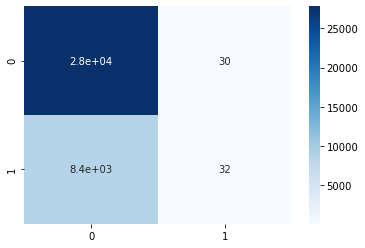

In [81]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm,annot=True,cmap='Blues');

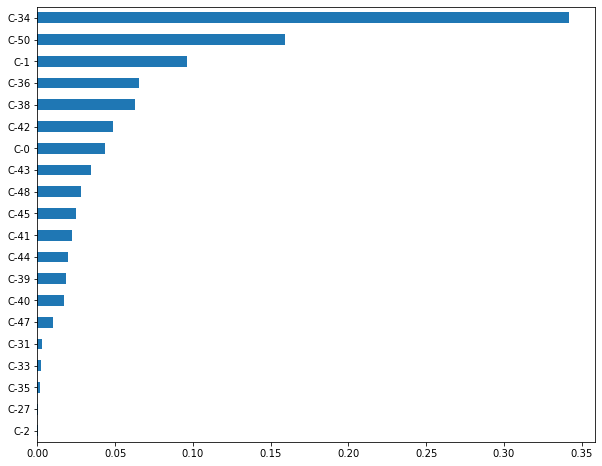

In [82]:
rf_feature_importance = pd.Series(rf_cv.best_estimator_.feature_importances_, index=t.columns)
rf_feature_importance.sort_values().plot(kind='barh',figsize=(10,8));

In [83]:
dfc[left.columns].dropna().head()

,C-9,C-10,C-11,C-12,C-13,C-14,C-15,C-16,C-17,C-18,C-19,C-20,C-21,C-22,C-24,C-26,C-29,C-46,C-49
ID,,,,,,,,,,,,,,,,,,,
249,01OCT12:00:00:00,02NOV09:00:00:00,05MAY11:00:00:00,05JUN11:00:00:00,01MAR12:00:00:00,02FEB12:00:00:00,05APR10:00:00:00,21MAY12:00:00:00,20APR11:00:00:00,13APR12:00:00:00,05APR10:00:00:00,21MAY12:00:00:00,01MAR12:00:00:00,13APR12:00:00:00,BEAVERTON,01FEB14:00:16:00,03OCT12:02:00:00,CONTACT,-1
17628,26FEB12:00:00:00,02SEP11:00:00:00,02SEP11:00:00:00,08MAR12:00:00:00,12DEC11:00:00:00,25JAN12:00:00:00,02SEP11:00:00:00,08MAR12:00:00:00,15DEC11:00:00:00,13FEB12:00:00:00,02SEP11:00:00:00,08MAR12:00:00:00,15DEC11:00:00:00,13FEB12:00:00:00,SAINT MARYS,30JAN14:22:44:00,11MAY12:02:00:00,-1,-1
23801,07AUG12:00:00:00,20JUL10:00:00:00,01DEC10:00:00:00,29APR11:00:00:00,04FEB11:00:00:00,07FEB11:00:00:00,01DEC10:00:00:00,14MAY11:00:00:00,15APR11:00:00:00,15APR11:00:00:00,01DEC10:00:00:00,14MAY11:00:00:00,15APR11:00:00:00,15APR11:00:00:00,DALY CITY,01FEB14:01:02:00,23OCT12:02:00:00,-1,-1
31786,28FEB12:00:00:00,14DEC10:00:00:00,10OCT11:00:00:00,11FEB12:00:00:00,06JAN12:00:00:00,26JAN12:00:00:00,06JUN11:00:00:00,07FEB12:00:00:00,23DEC11:00:00:00,08DEC11:00:00:00,06JUN11:00:00:00,11FEB12:00:00:00,06JAN12:00:00:00,26JAN12:00:00:00,KILLEEN,30JAN14:22:53:00,17MAY12:02:00:00,-1,-1
65173,27OCT12:00:00:00,07MAR09:00:00:00,21NOV11:00:00:00,10OCT12:00:00:00,27JUL12:00:00:00,31JUL12:00:00:00,10APR12:00:00:00,19OCT12:00:00:00,15JUN12:00:00:00,01OCT12:00:00:00,21NOV11:00:00:00,19OCT12:00:00:00,27JUL12:00:00:00,01OCT12:00:00:00,VALDOSTA,01FEB14:01:24:00,30OCT12:02:00:00,-1,-1


In [84]:
# check train sample, na vs value

print('train sample, value vs no-value:\n')

fr_val = {}

for col in ['C-46','C-49']:
    print(col)

    all_rows = dfc[col].count()
    rows_empty = dfc[col][(dfc[col]=='-1') | (dfc[col].isna())].count()
    rows_value = dfc[col][(dfc[col]!='-1') & (dfc[col].notna())].count()
    
    fr_val[col] = rows_value/all_rows
    
    print('all rows:',all_rows)
    print('rows with -1:',rows_empty)
    print('rows with a value:',rows_value,'(',round(100*fr_val[col],1),'%)\n')

    # similar for dtc

train sample, value vs no-value:

C-46
all rows: 144313
rows with -1: 130443
rows with a value: 13870 ( 9.6 %)

C-49
all rows: 144313
rows with -1: 135182
rows with a value: 9131 ( 6.3 %)



In [85]:
# check train vs test common

print('values, train vs test sample:\n')

comm = {}
fr_comm_tr_ts = {}

for col in ['C-46','C-49']:
    print(col)
    
    vals_train = dfc[col].astype('str').to_list()
    vals_test = dtc[col].astype('str').to_list()

    #total unique
    all = set(vals_train + vals_test)

    print('ntotal:',len(all))

    #common 
    comm[col] = [i for i in set(vals_train) if i in set(vals_test)]

    fr_comm_tr_ts[col] = len(comm[col])/len(all)
    print('common:',len(comm[col]),'(',round(100*fr_comm_tr_ts[col],1),'%)')

    #exclusive
    train_only = [i for i in set(vals_train) if i not in set(vals_test)]
    test_only  = [i for i in set(vals_test) if i not in set(vals_train)]

    print('train only:',len(train_only))
    print('test only'  ,len(test_only),'\n')


values, train vs test sample:

C-46
ntotal: 3144
common: 554 ( 17.6 %)
train only: 1270
test only 1320 

C-49
ntotal: 797
common: 432 ( 54.2 %)
train only: 177
test only 188 



In [86]:
# check train 0/1 exclusive if common with test

mask = df_all['target'] == 1

fr_exclusive_te = {}
test_1 = {}
test_0 = {}

for col in ['C-46','C-49']:
    print('test',col)
    
    t1 = [i for i in set(dfc[col][ mask].astype('str').to_list()) if i in comm[col]]
    t0 = [i for i in set(dfc[col][~mask].astype('str').to_list()) if i in comm[col]]
   
    #total unique
    all = set(t1 + t0)
    print('\ntotal:',len(all))

    #common 
    inboth = [i for i in set(t1) if i in set(t0)]
    
    fr_exclusive_te[col] = (len(all)-len(inboth))/len(all)
    
    print('in both:',len(inboth))
    print('in one:',len(all)-len(inboth),'(',round(100*fr_exclusive_te[col],1),'%)')
    
    #exclusive t1 and t0
    test_1[col] = [i for i in set(t1) if i not in set(t0)]
    test_0[col] = [i for i in set(t0) if i not in set(t1)]

    print('  in target=1 only:',len(test_1[col]))
    print('  in target=0 only:',len(test_0[col]),'\n----------')
    

test C-46

total: 554
in both: 184
in one: 370 ( 66.8 %)
  in target=1 only: 59
  in target=0 only: 311 
----------
test C-49

total: 432
in both: 220
in one: 212 ( 49.1 %)
  in target=1 only: 16
  in target=0 only: 196 
----------


In [87]:
for col in ['C-46','C-49']:
    
    fr = fr_val[col]*fr_comm_tr_ts[col]*fr_exclusive_te[col]

    print(col,'overall fraction:',round(100*fr,2),'% (',int(fr*dfc[col].count()),'rows)')

C-46 overall fraction: 1.13 % ( 1632 rows)
C-49 overall fraction: 1.68 % ( 2428 rows)


In [88]:
#for col in ['C-46','C-49']:
#    print('\n',col)
#    print('\n test exclusive 1:\n',test_1[col])
#    print('\n test exclusive 0:\n',test_0[col])

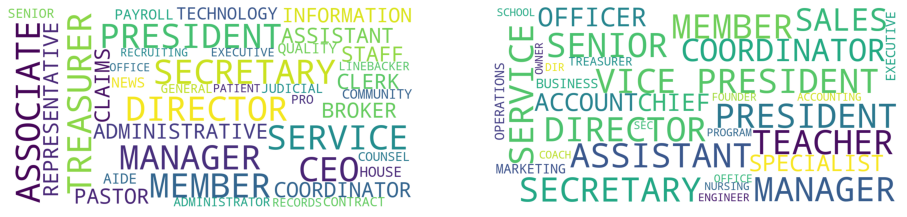

In [89]:
from wordcloud import WordCloud, STOPWORDS

col = 'C-46'

words1 = ''
for val in test_1[col]:
    words1 = words1 + ' ' + val

wordcloud1 = WordCloud(width = 1200, height = 600, background_color ='white',# stopwords = STOPWORDS, 
                      max_words=200, #prefer_horizontal = 1,
                      min_font_size = 30,            
                      max_font_size = 100, relative_scaling = 0,
                      min_word_length = 3).generate(words1) 
   
words0 = ''
for val in test_0[col]:
    words0 = words0 + ' ' + val
       
wordcloud0 = WordCloud(width = 1200, height = 600, background_color ='white',# stopwords = STOPWORDS, 
                      max_words=200, #prefer_horizontal = 1,
                      min_font_size = 30,
                      max_font_size = 100, relative_scaling = 0,
                      min_word_length = 3).generate(words0) 
                        
fig, ax = plt.subplots(1,2,figsize=(16,8),facecolor=None)
ax[0].imshow(wordcloud1) 
ax[0].axis("off")

ax[1].imshow(wordcloud0) 
ax[1].axis("off") ;

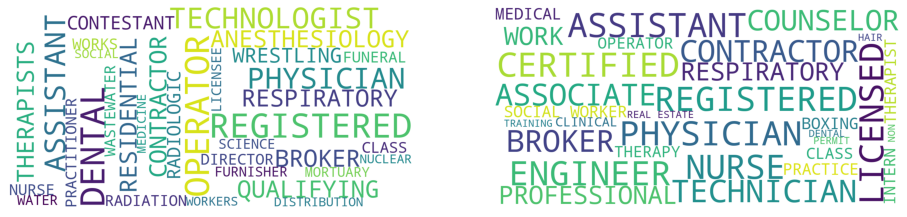

In [90]:
col = 'C-49'

words1 = ''
for val in test_1[col]:
    words1 = words1 + ' ' + val

wordcloud1 = WordCloud(width = 1200, height = 600, background_color ='white',# stopwords = STOPWORDS, 
                      max_words=200, #prefer_horizontal = 1,
                      min_font_size = 30,            
                      max_font_size = 100, relative_scaling = 0,
                      min_word_length = 3).generate(words1) 
   
words0 = ''
for val in test_0[col]:
    words0 = words0 + ' ' + val
    
wordcloud0 = WordCloud(width = 1200, height = 600, background_color ='white',# stopwords = STOPWORDS, 
                      max_words=200, #prefer_horizontal = 1,
                      min_font_size = 30,
                      max_font_size = 100, relative_scaling = 0,
                      min_word_length = 3).generate(words0) 
                        
fig, ax = plt.subplots(1,2,figsize=(16,8),facecolor=None)
ax[0].imshow(wordcloud1) 
ax[0].axis("off")

ax[1].imshow(wordcloud0) 
ax[1].axis("off") ;

In [91]:
#print('\n train/test common in C-46:\n',comm['C-46'])
#print('\n train/test common in C-46:\n',comm['C-49'])

In [92]:
# for a real-life problem, more coutious studies, however, for the purpose of the Kaggle grading here we will implement it, as it is an easy gain in score.

In [93]:
#del t, v
#t = dfc[['C-46','C-49']]
#v = dtc[['C-46','C-49']]

In [94]:
cols_7 = ['C-46','C-49']

for col in cols_7:
    t[col] = dfc[col]
    v[col] = dtc[col]

    t[col] = t[col].fillna('-1')
    v[col] = v[col].fillna('-1')

    t_vals = t[col].values
    v_vals = v[col].values
    
    t_vals_new = [0] * len(t_vals)
    v_vals_new = [0] * len(v_vals)
    
    for i, val in enumerate(t_vals):
        if val in test_1[col]:
            t_vals_new[i] = 2
        elif val in test_0[col]:
            t_vals_new[i] = 1
            
    for i, val in enumerate(v_vals):
        if val in test_1[col]:
            v_vals_new[i] = 2
        elif val in test_0[col]:
            v_vals_new[i] = 1
            
    t[col] = t_vals_new
    v[col] = v_vals_new
    
    print(t[col].value_counts())
    
# remove the features from the to-do list

left = left.drop(cols_7,axis=1)
print(left.shape[1]," features left:\n",left.columns.values)

0    144595
1       565
2        71
Name: C-46, dtype: int64
0    144769
1       444
2        18
Name: C-49, dtype: int64
17  features left:
 ['C-9' 'C-10' 'C-11' 'C-12' 'C-13' 'C-14' 'C-15' 'C-16' 'C-17' 'C-18'
 'C-19' 'C-20' 'C-21' 'C-22' 'C-24' 'C-26' 'C-29']


In [95]:
t

,C-0,C-1,C-50,C-2,C-31,C-33,C-34,C-35,C-47,C-43,C-44,C-45,C-48,C-39,C-40,C-41,C-27,C-42,C-36,C-38,C-46,C-49
ID,,,,,,,,,,,,,,,,,,,,,,
2,0,1,2,1.0,1.0,1.0,2.0,2.0,1.0,2,4,2,1,7,7,0,0.0,21,10,11,0,0
4,0,0,2,1.0,1.0,1.0,1.0,2.0,2.0,2,3,3,3,7,7,3,0.0,32,5,25,0,0
5,0,1,2,1.0,1.0,1.0,2.0,2.0,1.0,3,3,1,1,7,5,6,0.0,50,45,55,0,0
7,0,1,4,1.0,1.0,1.0,1.0,2.0,1.0,3,3,1,1,7,5,3,0.0,1,40,49,0,0
8,2,2,0,1.0,1.0,1.0,2.0,2.0,1.0,3,4,2,1,7,5,7,0.0,1,15,17,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290457,0,1,0,1.0,1.0,1.0,1.0,2.0,1.0,3,4,3,1,7,3,7,0.0,1,19,21,0,0
290458,2,1,2,1.0,1.0,1.0,1.0,2.0,2.0,3,4,3,3,3,3,7,0.0,13,5,5,0,0
290459,2,0,0,1.0,1.0,1.0,1.0,2.0,1.0,4,3,1,1,7,7,5,0.0,18,5,5,0,0


In [96]:
X_train, X_test, y_train, y_test = train_test_split(t, y, test_size=0.25, random_state=111)

rf = RandomForestClassifier(random_state=222)
rf.get_params()

#rf_cv = cross_validate(rf,X_train, y_train,scoring='roc_auc', cv = 3, verbose=2, n_jobs = -1)
#print(rf_cv)
#print("\n Test Score = ",round(np.mean(rf_cv['test_score']),3))

param_grid = {'n_estimators': [100],
              'max_depth': [10],
#              'bootstrap': [True, False]
             }
   
#rf_cv = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter = 100,
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='roc_auc', cv = 5, verbose=2, n_jobs = -1)
#                           scoring='recall', cv = 5, verbose=2, n_jobs = -1)
rf_cv.fit(X_train,y_train)

print("Best Parameters:",rf_cv.best_params_)
print("Best Score:",round(rf_cv.best_score_,4),'\n')

y_pred = rf_cv.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['RF 0','RF 1']))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.3s remaining:   11.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.9s finished


Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best Score: 0.6673 

              precision    recall  f1-score   support

        RF 0       0.77      1.00      0.87     27856
        RF 1       0.60      0.00      0.01      8452

    accuracy                           0.77     36308
   macro avg       0.68      0.50      0.44     36308
weighted avg       0.73      0.77      0.67     36308



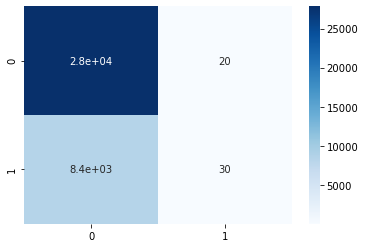

In [97]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm,annot=True,cmap='Blues');

In [98]:
X_test['C-46'][(X_test['C-46']==2) | (X_test['C-49']==2)].count()

10

In [99]:
dfc[left.columns].dropna().head()

,C-9,C-10,C-11,C-12,C-13,C-14,C-15,C-16,C-17,C-18,C-19,C-20,C-21,C-22,C-24,C-26,C-29
ID,,,,,,,,,,,,,,,,,
249,01OCT12:00:00:00,02NOV09:00:00:00,05MAY11:00:00:00,05JUN11:00:00:00,01MAR12:00:00:00,02FEB12:00:00:00,05APR10:00:00:00,21MAY12:00:00:00,20APR11:00:00:00,13APR12:00:00:00,05APR10:00:00:00,21MAY12:00:00:00,01MAR12:00:00:00,13APR12:00:00:00,BEAVERTON,01FEB14:00:16:00,03OCT12:02:00:00
17628,26FEB12:00:00:00,02SEP11:00:00:00,02SEP11:00:00:00,08MAR12:00:00:00,12DEC11:00:00:00,25JAN12:00:00:00,02SEP11:00:00:00,08MAR12:00:00:00,15DEC11:00:00:00,13FEB12:00:00:00,02SEP11:00:00:00,08MAR12:00:00:00,15DEC11:00:00:00,13FEB12:00:00:00,SAINT MARYS,30JAN14:22:44:00,11MAY12:02:00:00
23801,07AUG12:00:00:00,20JUL10:00:00:00,01DEC10:00:00:00,29APR11:00:00:00,04FEB11:00:00:00,07FEB11:00:00:00,01DEC10:00:00:00,14MAY11:00:00:00,15APR11:00:00:00,15APR11:00:00:00,01DEC10:00:00:00,14MAY11:00:00:00,15APR11:00:00:00,15APR11:00:00:00,DALY CITY,01FEB14:01:02:00,23OCT12:02:00:00
31786,28FEB12:00:00:00,14DEC10:00:00:00,10OCT11:00:00:00,11FEB12:00:00:00,06JAN12:00:00:00,26JAN12:00:00:00,06JUN11:00:00:00,07FEB12:00:00:00,23DEC11:00:00:00,08DEC11:00:00:00,06JUN11:00:00:00,11FEB12:00:00:00,06JAN12:00:00:00,26JAN12:00:00:00,KILLEEN,30JAN14:22:53:00,17MAY12:02:00:00
65173,27OCT12:00:00:00,07MAR09:00:00:00,21NOV11:00:00:00,10OCT12:00:00:00,27JUL12:00:00:00,31JUL12:00:00:00,10APR12:00:00:00,19OCT12:00:00:00,15JUN12:00:00:00,01OCT12:00:00:00,21NOV11:00:00:00,19OCT12:00:00:00,27JUL12:00:00:00,01OCT12:00:00:00,VALDOSTA,01FEB14:01:24:00,30OCT12:02:00:00


In [100]:
# town names
col_8 = 'C-24'

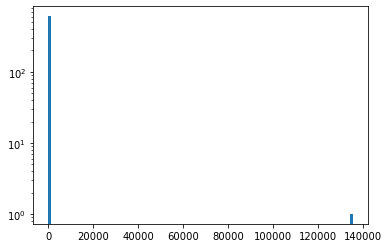

In [101]:
locs = dfc[col].value_counts()
plt.hist(locs.values,bins=100,log=True);

In [102]:
uscities = pd.read_csv("uscities.csv")

In [103]:
uscities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28372 entries, 0 to 28371
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          28372 non-null  object 
 1   city_ascii    28372 non-null  object 
 2   state_id      28372 non-null  object 
 3   state_name    28372 non-null  object 
 4   county_fips   28372 non-null  int64  
 5   county_name   28372 non-null  object 
 6   lat           28372 non-null  float64
 7   lng           28372 non-null  float64
 8   population    28372 non-null  int64  
 9   density       28372 non-null  float64
 10  source        28372 non-null  object 
 11  military      28372 non-null  bool   
 12  incorporated  28372 non-null  bool   
 13  timezone      28372 non-null  object 
 14  ranking       28372 non-null  int64  
 15  zips          28371 non-null  object 
 16  id            28372 non-null  int64  
dtypes: bool(2), float64(3), int64(4), object(8)
memory usage: 3.3+ MB


In [104]:
uscities.isna().sum()

city            0
city_ascii      0
state_id        0
state_name      0
county_fips     0
county_name     0
lat             0
lng             0
population      0
density         0
source          0
military        0
incorporated    0
timezone        0
ranking         0
zips            1
id              0
dtype: int64

In [105]:
uscities[uscities['zips'].isna()]

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
28168,Attu Station,Attu Station,AK,Alaska,2016,Aleutians West,52.8955,173.123,17,0.0,polygon,False,True,America/Adak,3,NaN,1840037663


In [106]:
uscities = uscities.drop(uscities[uscities['zips'].isna()].index)

In [107]:
uscities.isna().sum()

city            0
city_ascii      0
state_id        0
state_name      0
county_fips     0
county_name     0
lat             0
lng             0
population      0
density         0
source          0
military        0
incorporated    0
timezone        0
ranking         0
zips            0
id              0
dtype: int64

In [108]:
uscities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28371 entries, 0 to 28371
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          28371 non-null  object 
 1   city_ascii    28371 non-null  object 
 2   state_id      28371 non-null  object 
 3   state_name    28371 non-null  object 
 4   county_fips   28371 non-null  int64  
 5   county_name   28371 non-null  object 
 6   lat           28371 non-null  float64
 7   lng           28371 non-null  float64
 8   population    28371 non-null  int64  
 9   density       28371 non-null  float64
 10  source        28371 non-null  object 
 11  military      28371 non-null  bool   
 12  incorporated  28371 non-null  bool   
 13  timezone      28371 non-null  object 
 14  ranking       28371 non-null  int64  
 15  zips          28371 non-null  object 
 16  id            28371 non-null  int64  
dtypes: bool(2), float64(3), int64(4), object(8)
memory usage: 3.5+ MB


In [109]:
uscities.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220,10715.0,polygon,False,True,America/New_York,1,11229 11226 11225 11224 11222 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807,3276.0,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8373,-87.6862,8604203,4574.0,polygon,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7839,-80.2102,6445545,5019.0,polygon,False,True,America/New_York,1,33129 33125 33126 33127 33128 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7936,-96.7662,5743938,1526.0,polygon,False,True,America/Chicago,1,75287 75098 75233 75254 75251 75252 75253 7503...,1840019440


In [110]:
usc = uscities[['city','city_ascii','state_id','population','density']]

In [111]:
us = usc[['city','population','density']][usc['state_id'] == 'PA']

In [112]:
usc[(usc['city'] == 'Middletown') & (usc['state_id'] == 'PA')]

,city,city_ascii,state_id,population,density
4241,Middletown,Middletown,PA,9594,1824.0
5160,Middletown,Middletown,PA,7386,1088.0


In [113]:
us.set_index('city',inplace=True)

us.loc['Middletown','population']

city
Middletown    9594
Middletown    7386
Name: population, dtype: int64

In [114]:
us.loc['Oakland','population']

city
Oakland    1469
Oakland    1377
Oakland     562
Name: population, dtype: int64

In [115]:
us.reset_index(inplace=True)
us[us['city'] == 'Middletown']['population']

113    9594
170    7386
Name: population, dtype: int64

In [116]:
us[us['city'] == 'Oakland']['population']

754     1469
784     1377
1171     562
Name: population, dtype: int64

In [117]:
usc[(usc['city'] == 'Middletown') & (usc['state_id'] == 'PA')]['population'].value_counts().reset_index().iloc[0,0]

9594

In [118]:
usc[(usc['city'] == 'Oakland') & (usc['state_id'] == 'PA')]#['population']#.value_counts()#.reset_index().iloc[0,0]

,city,city_ascii,state_id,population,density
12460,Oakland,Oakland,PA,1469,618.0
12824,Oakland,Oakland,PA,1377,375.0
18156,Oakland,Oakland,PA,562,486.0


In [119]:
uscities[(usc['city'] == 'Oakland') & (usc['state_id'] == 'PA')]#['population']#.value_counts()#.reset_index().iloc[0,0]

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
12460,Oakland,Oakland,PA,Pennsylvania,42073,Lawrence,40.9915,-80.3671,1469,618.0,polygon,False,False,America/New_York,3,16101,1840149256
12824,Oakland,Oakland,PA,Pennsylvania,42021,Cambria,40.3055,-78.8819,1377,375.0,polygon,False,False,America/New_York,3,15904 15902,1840144363
18156,Oakland,Oakland,PA,Pennsylvania,42115,Susquehanna,41.9506,-75.6095,562,486.0,polygon,False,True,America/New_York,3,18847,1840003327


In [120]:
duplicates = [('Chicago','IL'),('Newtown','PA'),('Georgetown','PA'),('Franklin','PA'),('Jefferson','PA'),('Middletown','PA'),
              ('Oakland','PA'),('Oakwood','OH'),('Midway','FL')]

for town, state in duplicates:
    
#    print(uscities[(usc['city'] == town) & (usc['state_id'] == state)])

    print('1)\n',uscities[(usc['city'] == town) & (usc['state_id'] == state)][['city','state_id','zips','population']])
    print('2)\n',uscities[(usc['city'] == town) & (usc['state_id'] == state)]['zips'])
    print('3)\n',uscities[(usc['city'] == town) & (usc['state_id'] == state)]['zips'].values)
    print('4)\n',uscities[(usc['city'] == town) & (usc['state_id'] == state)]['zips'].values[0])
    print('--------------')

1)
       city state_id                                               zips  \
2  Chicago       IL  60018 60649 60641 60640 60643 60642 60645 6064...   

   population  
2     8604203  
2)
 2    60018 60649 60641 60640 60643 60642 60645 6064...
Name: zips, dtype: object
3)
 ['60018 60649 60641 60640 60643 60642 60645 60644 60647 60646 60616 60617 60614 60615 60612 60613 60610 60611 60618 60619 60827 60638 60639 60634 60636 60637 60630 60631 60632 60633 60605 60604 60607 60606 60601 60603 60602 60609 60608 60106 60661 60660 60659 60652 60653 60651 60656 60657 60654 60655 60623 60622 60621 60620 60626 60625 60624 60629 60628 60707 60499 60664 60666 60668 60669 60670 60673 60674 60675 60677 60678 60680 60681 60682 60684 60685 60686 60687 60688 60689 60690 60694 60695 60696 60699']
4)
 60018 60649 60641 60640 60643 60642 60645 60644 60647 60646 60616 60617 60614 60615 60612 60613 60610 60611 60618 60619 60827 60638 60639 60634 60636 60637 60630 60631 60632 60633 60605 60604 60607 60606 6060

In [121]:
duplicates = [('Chicago','IL'),('Newtown','PA'),('Georgetown','PA'),('Franklin','PA'),('Jefferson','PA'),('Middletown','PA'),
              ('Oakland','PA'),('Oakwood','OH'),('Midway','FL')]

for town, state in duplicates:
    
#    print(uscities[(usc['city'] == town) & (usc['state_id'] == state)])

    print('1)\n',uscities[(usc['city'] == town) & (usc['state_id'] == state)][['city','state_id','population']])
    print('2)\n',uscities[(usc['city'] == town) & (usc['state_id'] == state)]['population'])
    print('3)\n',uscities[(usc['city'] == town) & (usc['state_id'] == state)]['population'].values)
    print('4)\n',uscities[(usc['city'] == town) & (usc['state_id'] == state)]['population'].values[0])
    print('--------------')

1)
       city state_id  population
2  Chicago       IL     8604203
2)
 2    8604203
Name: population, dtype: int64
3)
 [8604203]
4)
 8604203
--------------
1)
           city state_id  population
10274  Newtown       PA        2240
22648  Newtown       PA         251
2)
 10274    2240
22648     251
Name: population, dtype: int64
3)
 [2240  251]
4)
 2240
--------------
1)
              city state_id  population
10934  Georgetown       PA        1957
13654  Georgetown       PA        1193
24626  Georgetown       PA         162
2)
 10934    1957
13654    1193
24626     162
Name: population, dtype: int64
3)
 [1957 1193  162]
4)
 1957
--------------
1)
            city state_id  population
4532   Franklin       PA        8802
21862  Franklin       PA         293
2)
 4532     8802
21862     293
Name: population, dtype: int64
3)
 [8802  293]
4)
 8802
--------------
1)
             city state_id  population
16612  Jefferson       PA         732
22606  Jefferson       PA         253
2)
 16612 

In [122]:
names = [('BEAVERTON','OR'),('KILLEEN','TX'),('VALDOSTA','GA')]

# first find columns that potentially could contain a zip code

df_max = df_all.select_dtypes(exclude='object').max()
cols_max = df_max[(df_max > 10000) & (df_max < 100000)].index

# now do the search in those columns using a few names above 

for town, state in names:
    
    zip_codes = uscities[(usc['city'].str.upper() == town) & (usc['state_id'] == state)]['zips'].values[0]
    
    print('\n',town,',',state,'with zip codes:',zip_codes,'\n')
    
    
    found_zip_code = {}
    
    # reduced dataset for town and state, town in C-24 -> VAR_0200, state in C-36 -> VAR_0237
    subdf = df_all[(df_all['VAR_0200'] == town) & (df_all['VAR_0237'] == state)][cols_max]
    
    for col in cols_max:
        
        for val in subdf[col].values:

            if val == val:
                
                val = str(int(val))
      
                if len(val) == 5 and val in zip_codes and val not in found_zip_code.keys():
                    
                    print(val,'in column',col)
                    
                    found_zip_code[val] = True


 BEAVERTON , OR with zip codes: 97225 97005 97007 97006 97008 97075 97076 97077 97079 

97005 in column VAR_0241
97007 in column VAR_0241
97008 in column VAR_0241
97006 in column VAR_0241

 KILLEEN , TX with zip codes: 76541 76543 76542 76549 76540 76547 

76543 in column VAR_0241
76549 in column VAR_0241
76541 in column VAR_0241
76542 in column VAR_0241

 VALDOSTA , GA with zip codes: 31698 31602 31601 31605 31603 31604 

31605 in column VAR_0241
31602 in column VAR_0241
31601 in column VAR_0241


In [123]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [124]:
"""

cols_8 = ['C-24','C-36','C-38']

found = [0] * dfc.shape[0]
n     = [0] * dfc.shape[0]
d     = [0] * dfc.shape[0]

logs = []

for i, (town, state) in enumerate(zip(dfc['C-24'].values,dfc['C-36'].values)):   
    
    # skip nans
    if town != town or state != state:

        continue

    # a few exceptions fuzzywuzzy can't handle
    town = town.replace('SAINT','ST.')
    town = town.replace('CHGO','CHICAGO')
    town = town.replace('CINTI','CINCINNATI')
    town = town.replace('CHLT','CHARLOTTE')
    town = town.replace('SLC','SALT LAKE CITY')
    town = town.replace('INDPLS','INDIANAPOLIS')
    town = town.replace('JAX','JACKSONVILLE')
    town = town.replace('N CHAS','NORTH CHARLESTON')
    town = town.replace('CHAS','CHARLESTON')
    town = town.replace('BATTLEMTN','BATTLE MOUNTAIN')    
    town = town.replace('BROBX','BRONX')
    town = town.replace('TYLER','TAYLOR')
    town = town.replace('DUNMORE','ANMOORE')   
    town = town.replace('REIGLEWOOD','RIEGELWOOD')
    town = town.replace('CALLAO','CALLAGHAN')
    town = town.replace('ILLINOIS','ILLIOPOLIS')    
    town = town.replace('PECKVILLE','PARKVILLE')       
#    town.replace('','')
    

    # narrow to state 
    us = usc[['city','population','density']][usc['state_id'] == state]
    
    best_name, score = process.extractOne(town,[cit for cit in us['city'].str.upper().values])
    
    if score > 80:
            
#        logs.append((town,best_name,score))
            
        found[i] = found[i] + 1
        
        # in very rear cases - 2 or 3 entries, same town names, different counties
        # values[0] takes one with the highest population
        
        n[i] = us[ us['city'].str.upper() == best_name]['population'].values[0]
        d[i] = us[ us['city'].str.upper() == best_name]['density'].values[0]
        
"""
"""
    else:
        
        closest = 'xxx'
        highest = 0.
        
        closestR = 'xxx'
        highestR = 0.
        
        closestT = 'xxx'
        highestT = 0.
        
        for ct in us['city'].values:
            
            Ratio            = fuzz.ratio(town,ct.upper())
            Partial_Ratio    = fuzz.partial_ratio(town,ct.upper())
#            Token_Sort_Ratio = fuzz.token_sort_ratio(town,ct.upper())
            Token_Set_Ratio  = fuzz.token_set_ratio(town,ct.upper())

            if(Ratio > highest):
                highest = Ratio
                closest = ct
        
            if(Partial_Ratio > highestR):
                highestR = Partial_Ratio
                closestR = ct
                
            if(Token_Set_Ratio > highestT):
                highestT = Token_Set_Ratio
                closestT = ct        
        
#        
        logs.append((town,state,closest,highest,closestR,highestR,closestT,highestT,(best_name, score)))
"""

# print('Number of matched:',sum(np.array(found) > 0 ));

"\n    else:\n        \n        closest = 'xxx'\n        highest = 0.\n        \n        closestR = 'xxx'\n        highestR = 0.\n        \n        closestT = 'xxx'\n        highestT = 0.\n        \n        for ct in us['city'].values:\n            \n            Ratio            = fuzz.ratio(town,ct.upper())\n            Partial_Ratio    = fuzz.partial_ratio(town,ct.upper())\n#            Token_Sort_Ratio = fuzz.token_sort_ratio(town,ct.upper())\n            Token_Set_Ratio  = fuzz.token_set_ratio(town,ct.upper())\n\n            if(Ratio > highest):\n                highest = Ratio\n                closest = ct\n        \n            if(Partial_Ratio > highestR):\n                highestR = Partial_Ratio\n                closestR = ct\n                \n            if(Token_Set_Ratio > highestT):\n                highestT = Token_Set_Ratio\n                closestT = ct        \n        \n#        \n        logs.append((town,state,closest,highest,closestR,highestR,closestT,highestT,(be

In [125]:
# MONCKS CORNER SC FL     - Moncks Corner town, South Carolina
# OCALA, FL, OH           - Ocala city, Florida
# APOPKA FL VA            - Apopka city, Florida
# ALTAMONTE SPRINGS FL NC - Altamonte Springs city, Florida

In [126]:
df_all[['VAR_0200','VAR_0237','VAR_0241']].values

array([['FT LAUDERDALE', 'FL', 33324.0],
       ['SANTEE', 'CA', 92071.0],
       ['REEDSVILLE', 'WV', 26547.0],
       ...,
       ['COVINA', 'CA', 91722.0],
       ['BATAVIA', 'OH', 45103.0],
       ['SHERMAN OAKS', 'CA', 91411.0]], dtype=object)

In [127]:
found = [0] * dfc.shape[0]
n    = [0] * dfc.shape[0]
d    = [0] * dfc.shape[0]

for i, ( town, state, zip_code) in enumerate( df_all[['VAR_0200','VAR_0237','VAR_0241']].values):  

    # skip nans
    if zip_code != zip_code or state != state:
        
        continue
 
    zip_code = str( int( zip_code))

    #loop over the census table
    
    for city,zips,po,de in uscities[['city','zips','population','density']][uscities['state_id'] == state].values:

#        print(state,city,po,de)

#        if(type(zips) != type("string")):
#            print(i,zip_code,'->',zips)
        
        if zip_code in zips:
            
#            print(town, state, zip_code,'->',city,'    (',po,de,')')

            found[i] = found[i] + 1
            n[i] = po
            d[i] = de
            
            break
    
#    if found[i] == 0:
#        print(town, state, zip_code,'-> not found')

In [128]:
(np.array(found)==0).sum()

5485

In [129]:
uscities[((uscities['city'] == 'Hueytown') | (uscities['city'] == 'Concord') | (uscities['city'] == 'Rock Creek')) & (uscities['state_id'] =='AL')]

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
2991,Hueytown,Hueytown,AL,Alabama,1073,Jefferson,33.4237,-87.0220,15322,300.0,polygon,False,True,America/Chicago,3,35023 35061,1840014796
11711,Concord,Concord,AL,Alabama,1073,Jefferson,33.4674,-87.0392,1690,193.0,polygon,False,False,America/Chicago,3,35023,1840013094
12851,Rock Creek,Rock Creek,AL,Alabama,1073,Jefferson,33.4772,-87.0812,1369,175.0,polygon,False,False,America/Chicago,3,35023,1840027632


In [130]:
uscities[uscities['city'] == 'Spring Valley'].head(1)

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
225,Spring Valley,Spring Valley,NV,Nevada,32003,Clark,36.0987,-115.2619,199722,2318.0,polygon,False,False,America/Los_Angeles,2,89103 89147 89146 89148 89113 89117 89118 8915...,1840033832


In [131]:
import simplejson
#
#with open('good_towns.txt', 'w') as f:
#    simplejson.dump(logs, f)

In [132]:
#with open("good_towns.txt") as f: 
#    logs2 = simplejson.load(f)
#
#type(logs2)

In [133]:
#with open('n.txt', 'w') as f:
#    simplejson.dump(n, f)
   
with open('n_d.txt', 'w') as f:
   simplejson.dump( (n,d), f)

#with open("n_d.txt") as f: 
#    n2, d2 = simplejson.load(f)

In [134]:
import pickle

with open('population.pkl', 'wb') as f:
   pickle.dump(n, f)

with open('density.pkl', 'wb') as f:
   pickle.dump(d, f)

In [135]:
#with open('population.pkl', 'rb') as f:
#   n2 = pickle.load(f)
#
#with open('density.pkl', 'rb') as f:
#   d2 = pickle.load(f)

(-1000.0, 10000.0)

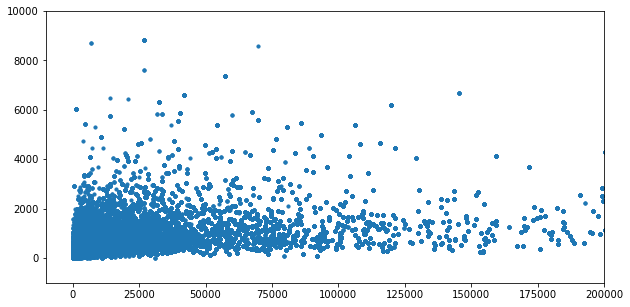

In [136]:
plt.figure(figsize=(10,5))
plt.scatter(n,d,s=10)
plt.xlim(-10000,200_000)
plt.ylim(-1000,10_000)

In [137]:
print(np.timedelta64(1, 'h'))

1 hours


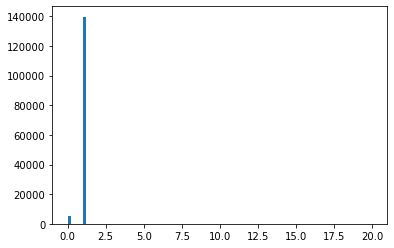

In [138]:
plt.hist(found,bins=100,range=(0,20));#,log=True);

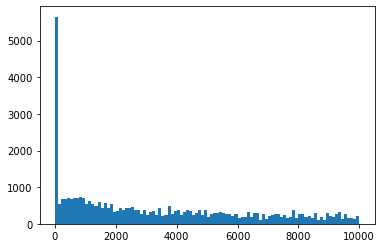

In [139]:
plt.hist(n,bins=100,range=(0,10000));#,log=True);

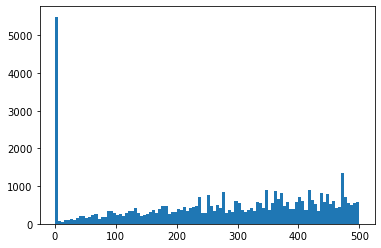

In [140]:
plt.hist(d,bins=100,range=(0,500));#,log=True);

In [141]:
left = left.drop(col_8,axis=1)
print(left.shape[1]," features left:\n",left.columns.values)

16  features left:
 ['C-9' 'C-10' 'C-11' 'C-12' 'C-13' 'C-14' 'C-15' 'C-16' 'C-17' 'C-18'
 'C-19' 'C-20' 'C-21' 'C-22' 'C-26' 'C-29']


In [142]:
t['F-CITY-POPU'] = n

t.head()

,C-0,C-1,C-50,C-2,C-31,C-33,C-34,C-35,C-47,C-43,C-44,C-45,C-48,C-39,C-40,C-41,C-27,C-42,C-36,C-38,C-46,C-49,F-CITY-POPU
ID,,,,,,,,,,,,,,,,,,,,,,,
2,0,1,2,1.0,1.0,1.0,2.0,2.0,1.0,2,4,2,1,7,7,0,0.0,21,10,11,0,0,106306
4,0,0,2,1.0,1.0,1.0,1.0,2.0,2.0,2,3,3,3,7,7,3,0.0,32,5,25,0,0,3220118
5,0,1,2,1.0,1.0,1.0,2.0,2.0,1.0,3,3,1,1,7,5,6,0.0,50,45,55,0,0,604
7,0,1,4,1.0,1.0,1.0,1.0,2.0,1.0,3,3,1,1,7,5,3,0.0,1,40,49,0,0,6435
8,2,2,0,1.0,1.0,1.0,2.0,2.0,1.0,3,4,2,1,7,5,7,0.0,1,15,17,0,0,19448


In [143]:
X_train, X_test, y_train, y_test = train_test_split(t, y, test_size=0.25, random_state=111)

rf = RandomForestClassifier(random_state=222)
rf.get_params()

#rf_cv = cross_validate(rf,X_train, y_train,scoring='roc_auc', cv = 3, verbose=2, n_jobs = -1)
#print(rf_cv)
#print("\n Test Score = ",round(np.mean(rf_cv['test_score']),3))

param_grid = {'n_estimators': [100],
              'max_depth': [10],
#              'bootstrap': [True, False]
             }
   
#rf_cv = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter = 100,
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='roc_auc', cv = 5, verbose=2, n_jobs = -1)
#                           scoring='recall', cv = 5, verbose=2, n_jobs = -1)

rf_cv.fit(X_train,y_train)

print("Best Parameters:",rf_cv.best_params_)
print("Best Score:",round(rf_cv.best_score_,4),'\n')

y_pred = rf_cv.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['RF 0','RF 1']))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.8s remaining:   13.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.6s finished


Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best Score: 0.6676 

              precision    recall  f1-score   support

        RF 0       0.77      1.00      0.87     27856
        RF 1       0.84      0.00      0.01      8452

    accuracy                           0.77     36308
   macro avg       0.80      0.50      0.44     36308
weighted avg       0.78      0.77      0.67     36308



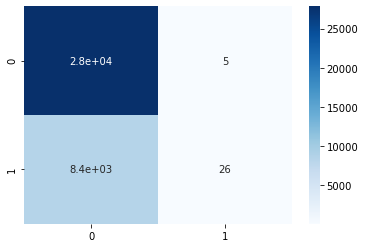

In [144]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm,annot=True,cmap='Blues');

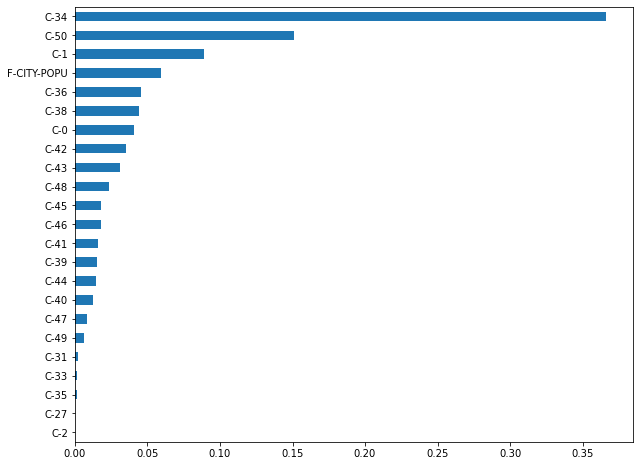

In [145]:
rf_feature_importance = pd.Series(rf_cv.best_estimator_.feature_importances_, index=t.columns)
rf_feature_importance.sort_values().plot(kind='barh',figsize=(10,8));

In [146]:
t['F-CITY-DENS'] = d
t.head()

,C-0,C-1,C-50,C-2,C-31,C-33,C-34,C-35,C-47,C-43,C-44,C-45,C-48,C-39,C-40,C-41,C-27,C-42,C-36,C-38,C-46,C-49,F-CITY-POPU,F-CITY-DENS
ID,,,,,,,,,,,,,,,,,,,,,,,,
2,0,1,2,1.0,1.0,1.0,2.0,2.0,1.0,2,4,2,1,7,7,0,0.0,21,10,11,0,0,106306,1175.0
4,0,0,2,1.0,1.0,1.0,1.0,2.0,2.0,2,3,3,3,7,7,3,0.0,32,5,25,0,0,3220118,1686.0
5,0,1,2,1.0,1.0,1.0,2.0,2.0,1.0,3,3,1,1,7,5,6,0.0,50,45,55,0,0,604,359.0
7,0,1,4,1.0,1.0,1.0,1.0,2.0,1.0,3,3,1,1,7,5,3,0.0,1,40,49,0,0,6435,80.0
8,2,2,0,1.0,1.0,1.0,2.0,2.0,1.0,3,4,2,1,7,5,7,0.0,1,15,17,0,0,19448,807.0


In [147]:
X_train, X_test, y_train, y_test = train_test_split(t, y, test_size=0.25, random_state=111)

rf = RandomForestClassifier(random_state=222)
rf.get_params()

#rf_cv = cross_validate(rf,X_train, y_train,scoring='roc_auc', cv = 3, verbose=2, n_jobs = -1)
#print(rf_cv)
#print("\n Test Score = ",round(np.mean(rf_cv['test_score']),3))

param_grid = {'n_estimators': [100],
              'max_depth': [10],
#              'bootstrap': [True, False]
             }
   
#rf_cv = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter = 100,
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='roc_auc', cv = 5, verbose=2, n_jobs = -1)
#                           scoring='recall', cv = 5, verbose=2, n_jobs = -1)

rf_cv.fit(X_train,y_train)

print("Best Parameters:",rf_cv.best_params_)
print("Best Score:",round(rf_cv.best_score_,4),'\n')

y_pred = rf_cv.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['RF 0','RF 1']))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.7s remaining:   17.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.3s finished


Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best Score: 0.6675 

              precision    recall  f1-score   support

        RF 0       0.77      1.00      0.87     27856
        RF 1       0.78      0.00      0.01      8452

    accuracy                           0.77     36308
   macro avg       0.77      0.50      0.44     36308
weighted avg       0.77      0.77      0.67     36308



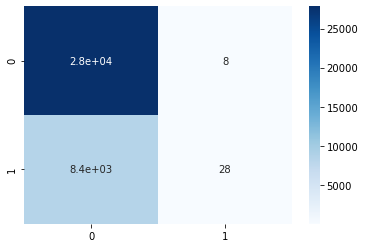

In [148]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm,annot=True,cmap='Blues');

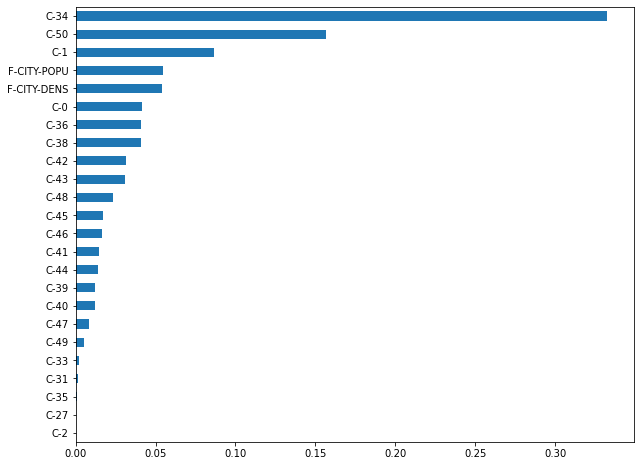

In [149]:
rf_feature_importance = pd.Series(rf_cv.best_estimator_.feature_importances_, index=t.columns)
rf_feature_importance.sort_values().plot(kind='barh',figsize=(10,8));

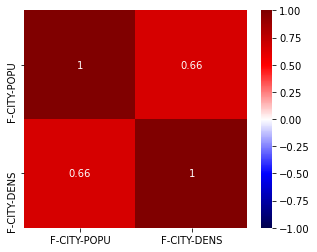

In [150]:
cm = t[['F-CITY-POPU','F-CITY-DENS']].corr()
f, ax = plt.subplots(figsize=(5, 4))

sns.heatmap(cm,cmap='seismic',center=0,vmin=-1.,vmax=1,annot=True);#,linewidths=.005)

In [151]:
#sh = pd.concat((t['F-CITY-POPU'],y),axis=1)

#sh['F-CITY-POPU'].hist(cumulative=True,density=True,bins=1000,range=(1,15_000_000),figsize=(30,10));
#plt.xticks(np.arange(0, 15_000_000+1, 500_000.0),fontsize=15);
#plt.yticks(np.arange(0, 1.05, 0.05),fontsize=15);

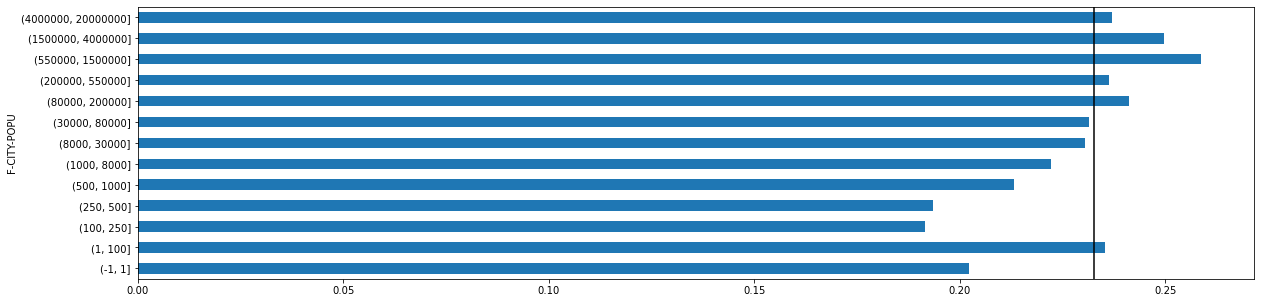

In [152]:
sh = pd.concat((t['F-CITY-POPU'],y),axis=1)

bins = pd.cut(sh['F-CITY-POPU'], [-1, 1,100,250,500,1000,8_000,30_000,80_000,200_000,550_000,1_500_000,4_000_000,20_000_000])
sh.groupby(bins)['target'].mean().plot(kind='barh',figsize=(20,5));
plt.vlines(sh['target'].mean(),-1,20);

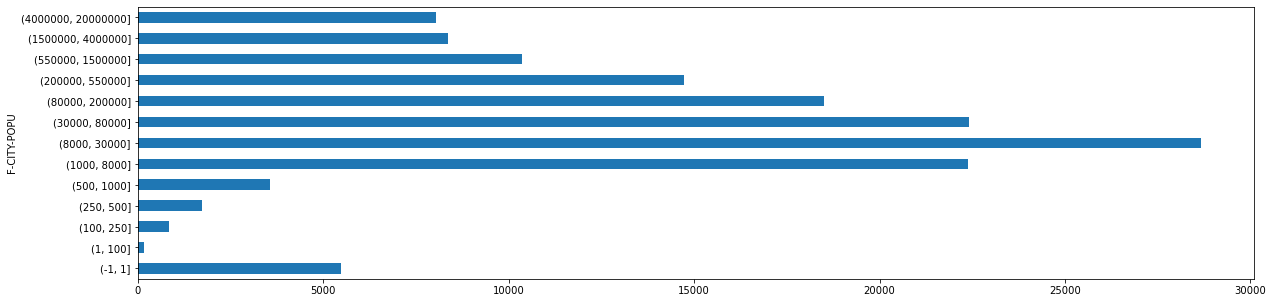

In [153]:
sh.groupby(bins)['target'].count().plot(kind='barh',figsize=(20,5));

In [154]:
#sh = pd.concat((t[['F-CITY-DENS']],y),axis=1)
#
#sh['F-CITY-DENS'].hist(cumulative=True,density=True,bins=1000,range=(1,10000),figsize=(30,10));
#plt.xticks(np.arange(0, 10000+1, 200.0),fontsize=15);
#plt.yticks(np.arange(0, 1.05, 0.05),fontsize=15);

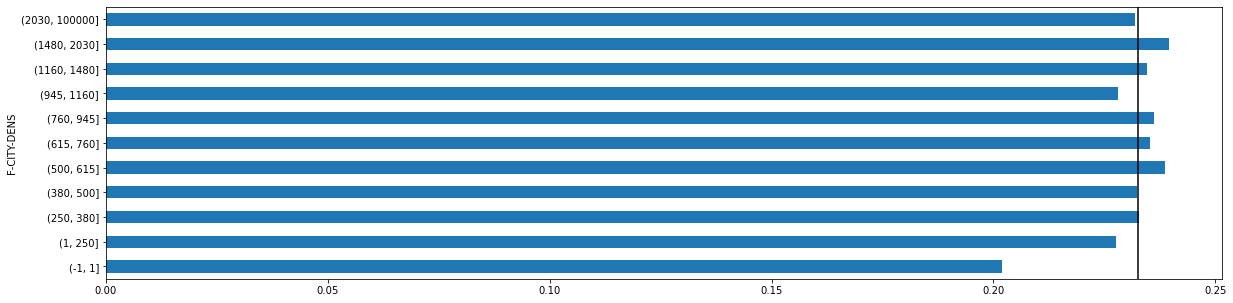

In [155]:
sh = pd.concat((t[['F-CITY-DENS']],y),axis=1)

#bins = pd.cut(sh['F-CITY-DENS'], [-1, 1,50,100,250,500,750,1000,1500,1600,5_000,10_000,20_000,50_000])
bins = pd.cut(sh['F-CITY-DENS'], [-1, 1,250,380,500,615,760,945,1160,1480,2030,100000])
sh.groupby(bins)['target'].mean().plot(kind='barh',figsize=(20,5));
plt.vlines(sh['target'].mean(),-1,20);

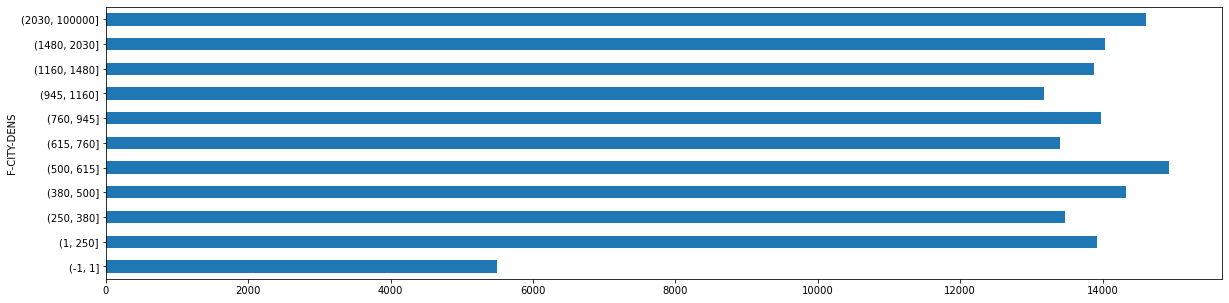

In [156]:
sh.groupby(bins)['target'].count().plot(kind='barh',figsize=(20,5));

In [157]:
col = 'F-STATE'

# the same or different states
#################
# t

same = dfc['C-36'] == dfc['C-38']
vals = same.astype('int')

# if both are unknown, set it to 0 rather than 1
m1m1 = (dfc['C-36'] == '-1') & (dfc['C-38'] == '-1')
vals[m1m1] = 0

print('t:',same.sum(),m1m1.sum())

t[col] = vals
###############
# v

same = dtc['C-36'] == dtc['C-38']
vals = same.astype('int')

# if both are unknown, set it to 0 rather than 1
m1m1 = (dtc['C-36'] == '-1') & (dtc['C-38'] == '-1')
vals[m1m1] = 0

print('v:',same.sum(),m1m1.sum())

v[col] = vals

t: 98547 0
v: 98181 0


In [158]:
X_train, X_test, y_train, y_test = train_test_split(t, y, test_size=0.25, random_state=111)

rf = RandomForestClassifier(random_state=222)
rf.get_params()

#rf_cv = cross_validate(rf,X_train, y_train,scoring='roc_auc', cv = 3, verbose=2, n_jobs = -1)
#print(rf_cv)
#print("\n Test Score = ",round(np.mean(rf_cv['test_score']),3))

param_grid = {'n_estimators': [100],
              'max_depth': [10],
#              'bootstrap': [True, False]
             }
   
#rf_cv = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter = 100,
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='roc_auc', cv = 5, verbose=2, n_jobs = -1)
#                           scoring='recall', cv = 5, verbose=2, n_jobs = -1)
rf_cv.fit(X_train,y_train)

print("Best Parameters:",rf_cv.best_params_)
print("Best Score:",round(rf_cv.best_score_,4),'\n')

y_pred = rf_cv.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['RF 0','RF 1']))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.1s remaining:   16.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.2s finished


Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best Score: 0.6673 

              precision    recall  f1-score   support

        RF 0       0.77      1.00      0.87     27856
        RF 1       0.71      0.00      0.01      8452

    accuracy                           0.77     36308
   macro avg       0.74      0.50      0.44     36308
weighted avg       0.75      0.77      0.67     36308



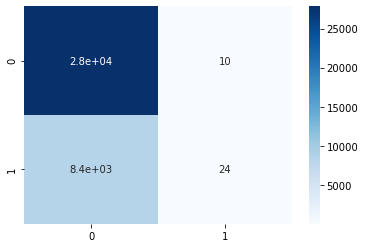

In [159]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm,annot=True,cmap='Blues');

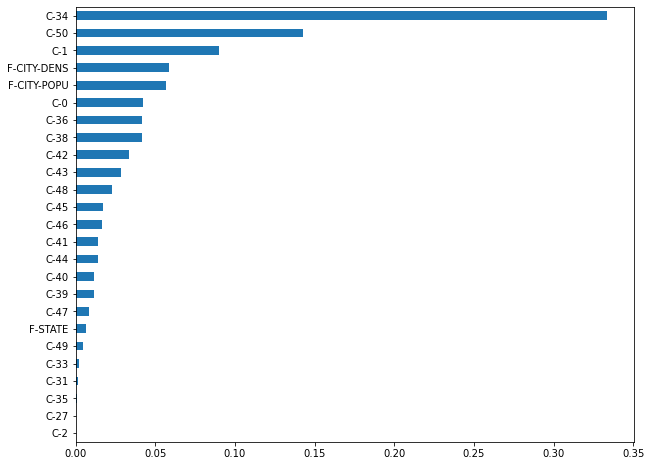

In [160]:
rf_feature_importance = pd.Series(rf_cv.best_estimator_.feature_importances_, index=t.columns)
rf_feature_importance.sort_values().plot(kind='barh',figsize=(10,8));

In [161]:
#t = t.drop('F-STATE',axis=1)
#t = t.drop('F-CITY-POPU',axis=1)
#t = t.drop('F-CITY-DENS',axis=1)

In [162]:
# C-43, C-44, C-45 have the same values of O,U,R, count them columns-wise as a new feature

In [163]:
cols_4 = ['C-43','C-44','C-45']

name_prefix = "F"
list_unique = []

for col in cols_4:
    print(col,dfc[col].unique())
    
    name_prefix = name_prefix + col[1:]
    [ list_unique.append(x) for x in dfc[col].unique().tolist() if x not in ['-1',np.nan] ]

    
list_unique = list(set(list_unique))

print(list_unique)
print(name_prefix)

for val in list_unique:
    
    t[name_prefix + "-n" + val] =  (dfc[cols_4] == val).sum(axis=1)

C-43 ['O' 'R' 'U' '-1' nan]
C-44 ['U' 'R' 'O' '-1' nan]
C-45 ['O' 'R' '-1' 'U' nan]
['O', 'R', 'U']
F-43-44-45


In [164]:
dfc[cols_4].head()

,C-43,C-44,C-45
ID,,,
2,O,U,O
4,O,R,R
5,R,R,-1
7,R,R,-1
8,R,U,O


In [165]:
(dfc[cols_4] == 'O').head()

,C-43,C-44,C-45
ID,,,
2,True,False,True
4,True,False,False
5,False,False,False
7,False,False,False
8,False,False,True


In [166]:
(dfc[cols_4] == 'O').sum(axis=1).head()

ID
2    2
4    1
5    0
7    0
8    1
dtype: int64

In [167]:
t.head()

,C-0,C-1,C-50,C-2,C-31,C-33,C-34,C-35,C-47,C-43,C-44,C-45,C-48,C-39,C-40,C-41,C-27,C-42,C-36,C-38,C-46,C-49,F-CITY-POPU,F-CITY-DENS,F-STATE,F-43-44-45-nO,F-43-44-45-nR,F-43-44-45-nU
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0,1,2,1.0,1.0,1.0,2.0,2.0,1.0,2,4,2,1,7,7,0,0.0,21,10,11,0,0,106306,1175.0,1,2,0,1
4,0,0,2,1.0,1.0,1.0,1.0,2.0,2.0,2,3,3,3,7,7,3,0.0,32,5,25,0,0,3220118,1686.0,0,1,2,0
5,0,1,2,1.0,1.0,1.0,2.0,2.0,1.0,3,3,1,1,7,5,6,0.0,50,45,55,0,0,604,359.0,1,0,2,0
7,0,1,4,1.0,1.0,1.0,1.0,2.0,1.0,3,3,1,1,7,5,3,0.0,1,40,49,0,0,6435,80.0,1,0,2,0
8,2,2,0,1.0,1.0,1.0,2.0,2.0,1.0,3,4,2,1,7,5,7,0.0,1,15,17,0,0,19448,807.0,1,1,1,1


In [168]:
X_train, X_test, y_train, y_test = train_test_split(t, y, test_size=0.25, random_state=111)

rf = RandomForestClassifier(random_state=222)
rf.get_params()

#rf_cv = cross_validate(rf,X_train, y_train,scoring='roc_auc', cv = 3, verbose=2, n_jobs = -1)
#print(rf_cv)
#print("\n Test Score = ",round(np.mean(rf_cv['test_score']),3))

param_grid = {'n_estimators': [100],
              'max_depth': [10],
#              'bootstrap': [True, False]
             }
   
#rf_cv = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter = 100,
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='roc_auc', cv = 5, verbose=2, n_jobs = -1)
#                           scoring='recall', cv = 5, verbose=2, n_jobs = -1)
rf_cv.fit(X_train,y_train)

print("Best Parameters:",rf_cv.best_params_)
print("Best Score:",round(rf_cv.best_score_,4),'\n')

y_pred = rf_cv.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['RF 0','RF 1']))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.3s remaining:   18.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.0s finished


Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best Score: 0.6669 

              precision    recall  f1-score   support

        RF 0       0.77      1.00      0.87     27856
        RF 1       0.61      0.00      0.01      8452

    accuracy                           0.77     36308
   macro avg       0.69      0.50      0.44     36308
weighted avg       0.73      0.77      0.67     36308



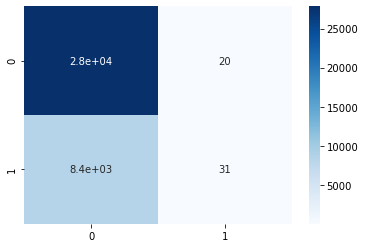

In [169]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm,annot=True,cmap='Blues');

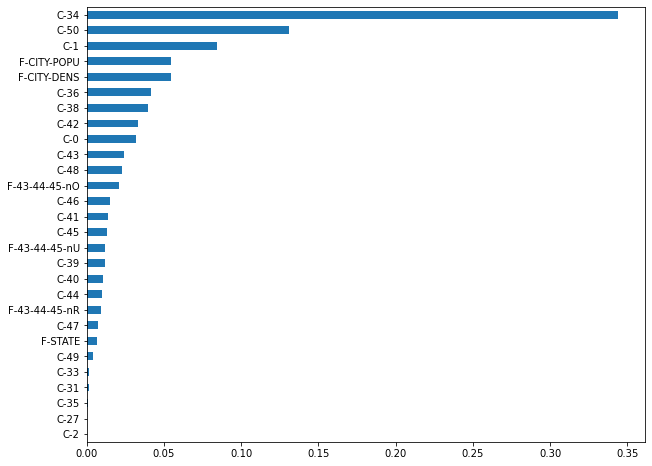

In [170]:
rf_feature_importance = pd.Series(rf_cv.best_estimator_.feature_importances_, index=t.columns)
rf_feature_importance.sort_values().plot(kind='barh',figsize=(10,8));

In [171]:
# C-39,C-40,C-41 have the same F,G,H,M,P,R,S,U values, count them too

In [172]:
cols_4 = ['C-39','C-40','C-41']


name_prefix = "F"
list_unique = []

for col in cols_4:
    print(col,dfc[col].unique())
    
    name_prefix = name_prefix + col[1:]
    [ list_unique.append(x) for x in dfc[col].unique().tolist() if x not in ['-1',np.nan] ]

    
list_unique = list(set(list_unique))

print(list_unique)
print(name_prefix)

for val in list_unique:
    
    t[name_prefix + "-n" + val] =  (dfc[cols_4] == val).sum(axis=1)

C-39 ['S' 'H' '-1' 'P' nan 'R' 'F' 'U']
C-40 ['S' 'P' 'H' '-1' nan 'R' 'U' 'M' 'F']
C-41 ['-1' 'H' 'R' 'S' 'P' nan 'F' 'M' 'G' 'U']
['U', 'H', 'R', 'F', 'M', 'G', 'P', 'S']
F-39-40-41


In [173]:
#t['C-43-44-45-nO'] = (dfc[cols_4] == 'O').sum(axis=1)
#t['C-43-44-45-nR'] = (dfc[cols_4] == 'R').sum(axis=1)
#t['C-43-44-45-nU'] = (dfc[cols_4] == 'U').sum(axis=1)

In [174]:
#t = t.drop(['F-43-44-45-nO','F-43-44-45-nR','F-43-44-45-nU'],axis=1)

In [175]:
#t = t.drop('F-CITY-DENS',axis=1)
#t = t.drop('F-CITY-POPU',axis=1)

In [176]:
t.head()

,C-0,C-1,C-50,C-2,C-31,C-33,C-34,C-35,C-47,C-43,C-44,C-45,C-48,C-39,C-40,C-41,C-27,C-42,C-36,C-38,C-46,C-49,F-CITY-POPU,F-CITY-DENS,F-STATE,F-43-44-45-nO,F-43-44-45-nR,F-43-44-45-nU,F-39-40-41-nU,F-39-40-41-nH,F-39-40-41-nR,F-39-40-41-nF,F-39-40-41-nM,F-39-40-41-nG,F-39-40-41-nP,F-39-40-41-nS
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0,1,2,1.0,1.0,1.0,2.0,2.0,1.0,2,4,2,1,7,7,0,0.0,21,10,11,0,0,106306,1175.0,1,2,0,1,0,0,0,0,0,0,0,2
4,0,0,2,1.0,1.0,1.0,1.0,2.0,2.0,2,3,3,3,7,7,3,0.0,32,5,25,0,0,3220118,1686.0,0,1,2,0,0,1,0,0,0,0,0,2
5,0,1,2,1.0,1.0,1.0,2.0,2.0,1.0,3,3,1,1,7,5,6,0.0,50,45,55,0,0,604,359.0,1,0,2,0,0,0,1,0,0,0,1,1
7,0,1,4,1.0,1.0,1.0,1.0,2.0,1.0,3,3,1,1,7,5,3,0.0,1,40,49,0,0,6435,80.0,1,0,2,0,0,1,0,0,0,0,1,1
8,2,2,0,1.0,1.0,1.0,2.0,2.0,1.0,3,4,2,1,7,5,7,0.0,1,15,17,0,0,19448,807.0,1,1,1,1,0,0,0,0,0,0,1,2


In [177]:
X_train, X_test, y_train, y_test = train_test_split(t, y, test_size=0.25, random_state=111)

rf = RandomForestClassifier(random_state=222)
rf.get_params()

#rf_cv = cross_validate(rf,X_train, y_train,scoring='roc_auc', cv = 3, verbose=2, n_jobs = -1)
#print(rf_cv)
#print("\n Test Score = ",round(np.mean(rf_cv['test_score']),3))

param_grid = {'n_estimators': [100],
              'max_depth': [10],
#              'bootstrap': [True, False]
             }
   
#rf_cv = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter = 100,
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='roc_auc', cv = 5, verbose=2, n_jobs = -1)
#                           scoring='recall', cv = 5, verbose=2, n_jobs = -1)
rf_cv.fit(X_train,y_train)

print("Best Parameters:",rf_cv.best_params_)
print("Best Score:",round(rf_cv.best_score_,4),'\n')

y_pred = rf_cv.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['RF 0','RF 1']))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.7s remaining:   17.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.3s finished


Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best Score: 0.6668 

              precision    recall  f1-score   support

        RF 0       0.77      1.00      0.87     27856
        RF 1       0.67      0.00      0.00      8452

    accuracy                           0.77     36308
   macro avg       0.72      0.50      0.44     36308
weighted avg       0.74      0.77      0.67     36308



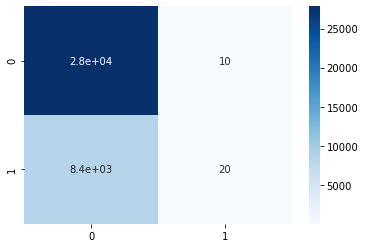

In [178]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm,annot=True,cmap='Blues');

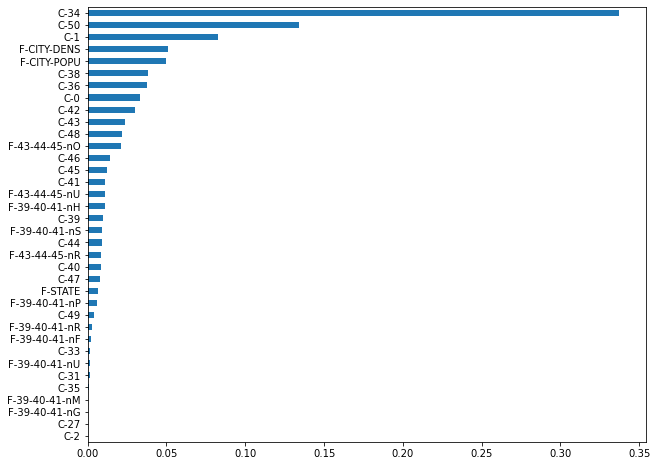

In [179]:
rf_feature_importance = pd.Series(rf_cv.best_estimator_.feature_importances_, index=t.columns)
rf_feature_importance.sort_values().plot(kind='barh',figsize=(10,8));

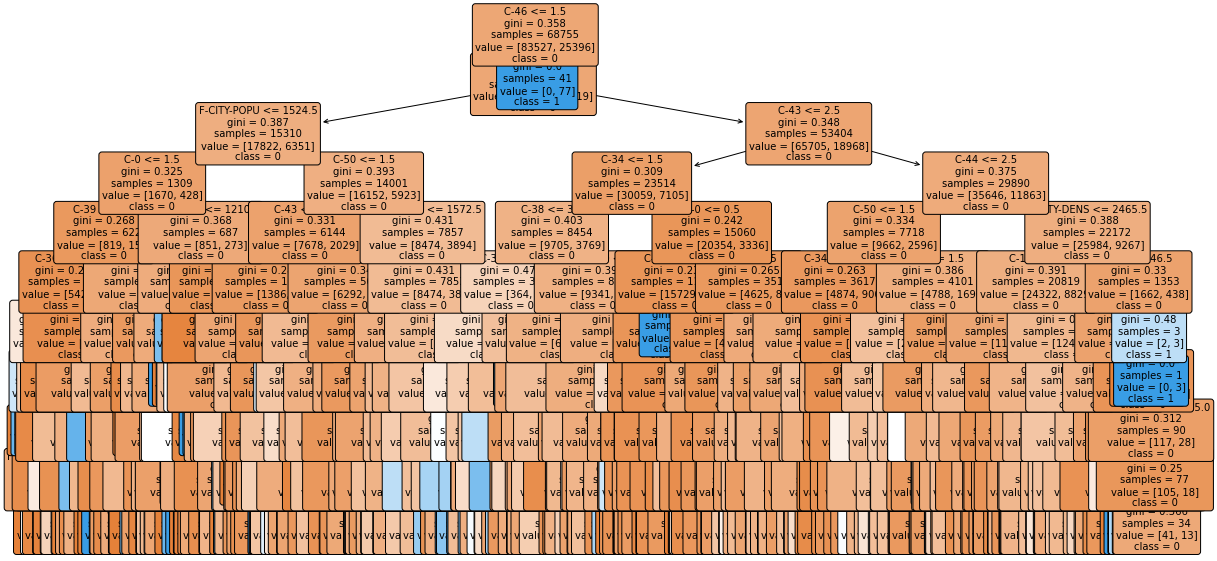

In [180]:
from sklearn import tree

plt.figure(figsize=(20,10))

model = rf_cv.best_estimator_.estimators_[10]

tree.plot_tree(model,filled=True,feature_names = t.columns, class_names = ["0", "1"], fontsize = 10,rounded=True);

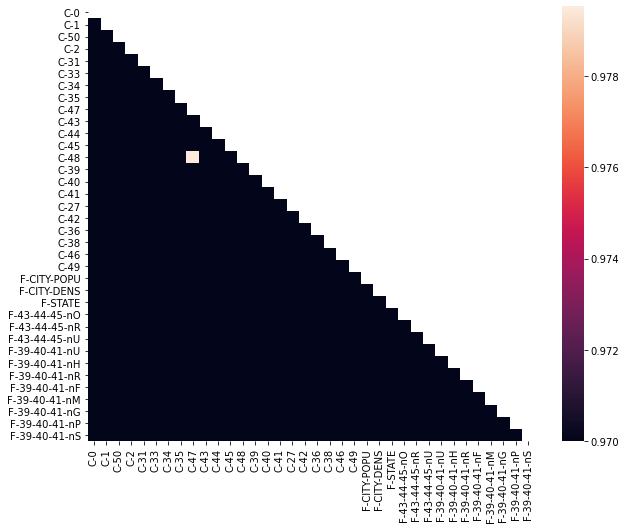

In [181]:
cm = t.corr()
f, ax = plt.subplots(figsize=(10, 8))

mask = np.triu(np.ones_like(cm, dtype=bool))

sns.heatmap(cm,mask=mask,vmin=0.97);

In [182]:
dfc[left.columns].dropna().head()

,C-9,C-10,C-11,C-12,C-13,C-14,C-15,C-16,C-17,C-18,C-19,C-20,C-21,C-22,C-26,C-29
ID,,,,,,,,,,,,,,,,
249,01OCT12:00:00:00,02NOV09:00:00:00,05MAY11:00:00:00,05JUN11:00:00:00,01MAR12:00:00:00,02FEB12:00:00:00,05APR10:00:00:00,21MAY12:00:00:00,20APR11:00:00:00,13APR12:00:00:00,05APR10:00:00:00,21MAY12:00:00:00,01MAR12:00:00:00,13APR12:00:00:00,01FEB14:00:16:00,03OCT12:02:00:00
17628,26FEB12:00:00:00,02SEP11:00:00:00,02SEP11:00:00:00,08MAR12:00:00:00,12DEC11:00:00:00,25JAN12:00:00:00,02SEP11:00:00:00,08MAR12:00:00:00,15DEC11:00:00:00,13FEB12:00:00:00,02SEP11:00:00:00,08MAR12:00:00:00,15DEC11:00:00:00,13FEB12:00:00:00,30JAN14:22:44:00,11MAY12:02:00:00
23801,07AUG12:00:00:00,20JUL10:00:00:00,01DEC10:00:00:00,29APR11:00:00:00,04FEB11:00:00:00,07FEB11:00:00:00,01DEC10:00:00:00,14MAY11:00:00:00,15APR11:00:00:00,15APR11:00:00:00,01DEC10:00:00:00,14MAY11:00:00:00,15APR11:00:00:00,15APR11:00:00:00,01FEB14:01:02:00,23OCT12:02:00:00
31786,28FEB12:00:00:00,14DEC10:00:00:00,10OCT11:00:00:00,11FEB12:00:00:00,06JAN12:00:00:00,26JAN12:00:00:00,06JUN11:00:00:00,07FEB12:00:00:00,23DEC11:00:00:00,08DEC11:00:00:00,06JUN11:00:00:00,11FEB12:00:00:00,06JAN12:00:00:00,26JAN12:00:00:00,30JAN14:22:53:00,17MAY12:02:00:00
65173,27OCT12:00:00:00,07MAR09:00:00:00,21NOV11:00:00:00,10OCT12:00:00:00,27JUL12:00:00:00,31JUL12:00:00:00,10APR12:00:00:00,19OCT12:00:00:00,15JUN12:00:00:00,01OCT12:00:00:00,21NOV11:00:00:00,19OCT12:00:00:00,27JUL12:00:00:00,01OCT12:00:00:00,01FEB14:01:24:00,30OCT12:02:00:00


In [183]:
dfc[left.columns].isna().sum()

C-9     101127
C-10        56
C-11    139361
C-12    144311
C-13    143142
C-14    139361
C-15    131001
C-16    142664
C-17    134506
C-18    131001
C-19    127699
C-20    141873
C-21    133158
C-22    127699
C-26        56
C-29        56
dtype: int64

In [184]:
dfc['C-29']

ID
2         08NOV11:02:00:00
4         02OCT12:02:00:00
5         13DEC11:02:00:00
7         01NOV12:02:00:00
8         15OCT11:02:00:00
                ...       
290457    07JUL12:02:00:00
290458    24MAY12:02:00:00
290459    21AUG12:02:00:00
290461    09MAY12:02:00:00
290463    19SEP12:02:00:00
Name: C-29, Length: 145231, dtype: object

In [185]:
dfc[left.columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145231 entries, 2 to 290463
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   C-9     44104 non-null   object
 1   C-10    145175 non-null  object
 2   C-11    5870 non-null    object
 3   C-12    920 non-null     object
 4   C-13    2089 non-null    object
 5   C-14    5870 non-null    object
 6   C-15    14230 non-null   object
 7   C-16    2567 non-null    object
 8   C-17    10725 non-null   object
 9   C-18    14230 non-null   object
 10  C-19    17532 non-null   object
 11  C-20    3358 non-null    object
 12  C-21    12073 non-null   object
 13  C-22    17532 non-null   object
 14  C-26    145175 non-null  object
 15  C-29    145175 non-null  object
dtypes: object(16)
memory usage: 18.8+ MB


You can stack / pd.to_datetime / unstack

pd.to_datetime works on a string, list, or pd.Series. dte is a pd.DataFrame and is why you are having issues. dte.stack() produces a a pd.Series where all rows are stacked on top of each other. However, in this stacked form, because it is a pd.Series, I can get a vectorized pd.to_datetime to work on it. the subsequent unstack simply reverses the initial stack to get the original form of dte

In [186]:
dttime = pd.to_datetime(dfc[left.columns].stack(),format='%d%b%y:%H:%M:%S').unstack()

In [187]:
dttime.dropna().head(10)

,C-9,C-10,C-11,C-12,C-13,C-14,C-15,C-16,C-17,C-18,C-19,C-20,C-21,C-22,C-26,C-29
ID,,,,,,,,,,,,,,,,
249,2012-10-01,2009-11-02,2011-05-05,2011-06-05,2012-03-01,2012-02-02,2010-04-05,2012-05-21,2011-04-20,2012-04-13,2010-04-05,2012-05-21,2012-03-01,2012-04-13,2014-02-01 00:16:00,2012-10-03 02:00:00
17628,2012-02-26,2011-09-02,2011-09-02,2012-03-08,2011-12-12,2012-01-25,2011-09-02,2012-03-08,2011-12-15,2012-02-13,2011-09-02,2012-03-08,2011-12-15,2012-02-13,2014-01-30 22:44:00,2012-05-11 02:00:00
23801,2012-08-07,2010-07-20,2010-12-01,2011-04-29,2011-02-04,2011-02-07,2010-12-01,2011-05-14,2011-04-15,2011-04-15,2010-12-01,2011-05-14,2011-04-15,2011-04-15,2014-02-01 01:02:00,2012-10-23 02:00:00
31786,2012-02-28,2010-12-14,2011-10-10,2012-02-11,2012-01-06,2012-01-26,2011-06-06,2012-02-07,2011-12-23,2011-12-08,2011-06-06,2012-02-11,2012-01-06,2012-01-26,2014-01-30 22:53:00,2012-05-17 02:00:00
65173,2012-10-27,2009-03-07,2011-11-21,2012-10-10,2012-07-27,2012-07-31,2012-04-10,2012-10-19,2012-06-15,2012-10-01,2011-11-21,2012-10-19,2012-07-27,2012-10-01,2014-02-01 01:24:00,2012-10-30 02:00:00
68261,2012-07-30,2008-10-16,2011-10-30,2012-06-01,2011-11-22,2012-03-01,2008-10-17,2012-06-21,2012-06-01,2012-05-25,2008-10-17,2012-06-21,2012-06-01,2012-05-25,2014-01-31 18:21:00,2012-08-10 02:00:00
68463,2011-12-16,2009-10-30,2009-10-30,2011-11-30,2010-06-24,2011-10-25,2010-04-14,2011-11-30,2011-09-01,2011-10-13,2009-10-30,2011-11-30,2011-09-01,2011-10-25,2014-01-31 16:57:00,2012-07-14 02:00:00
87091,2012-02-27,2010-01-21,2011-11-08,2012-04-24,2012-02-23,2012-02-27,2010-08-19,2011-01-21,2011-03-05,2010-08-19,2010-08-19,2012-04-24,2012-02-23,2012-02-27,2014-01-30 22:52:00,2012-05-16 02:00:00
95074,2012-03-28,2007-12-16,2010-11-30,2012-03-07,2011-10-14,2011-10-18,2009-07-14,2012-03-02,2012-03-02,2012-02-17,2009-07-14,2012-03-07,2012-03-02,2012-02-17,2014-01-30 20:06:00,2012-03-30 02:00:00


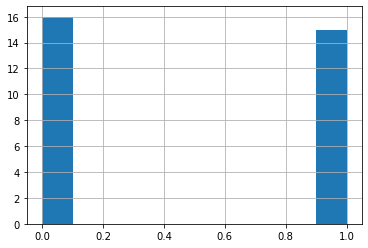

In [188]:
checky = pd.concat((dttime,y),axis=1)
checky.dropna()['target'].hist();

In [189]:
dttime

,C-9,C-10,C-11,C-12,C-13,C-14,C-15,C-16,C-17,C-18,C-19,C-20,C-21,C-22,C-26,C-29
ID,,,,,,,,,,,,,,,,
2,NaT,2011-11-08,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2014-01-29 21:16:00,2011-11-08 02:00:00
4,2012-09-04,2011-11-10,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2014-02-01 00:11:00,2012-10-02 02:00:00
5,NaT,2011-12-13,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2014-01-30 15:11:00,2011-12-13 02:00:00
7,NaT,2010-09-23,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2014-02-01 00:07:00,2012-11-01 02:00:00
8,NaT,2011-10-15,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2014-01-29 19:31:00,2011-10-15 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290457,2012-05-16,2010-04-27,NaT,NaT,NaT,NaT,2010-10-17,2012-06-08,2011-11-30,2012-05-16,2010-10-17,2012-06-08,2011-11-30,2012-05-16,2014-01-31 16:36:00,2012-07-07 02:00:00
290458,2012-05-22,2008-12-22,2011-09-25,NaT,NaT,2011-09-25,2010-01-12,NaT,2010-11-26,2010-01-12,2010-01-12,NaT,2010-11-26,2011-09-25,2014-01-30 23:23:00,2012-05-24 02:00:00
290459,2012-05-07,2011-11-29,2012-05-07,NaT,2012-07-03,2012-07-10,2012-04-26,NaT,2012-06-03,2012-04-26,2012-04-26,NaT,2012-07-03,2012-07-10,2014-01-31 21:10:00,2012-08-21 02:00:00


In [190]:
dttime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145175 entries, 2 to 290463
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   C-9     44104 non-null   datetime64[ns]
 1   C-10    145175 non-null  datetime64[ns]
 2   C-11    5870 non-null    datetime64[ns]
 3   C-12    920 non-null     datetime64[ns]
 4   C-13    2089 non-null    datetime64[ns]
 5   C-14    5870 non-null    datetime64[ns]
 6   C-15    14230 non-null   datetime64[ns]
 7   C-16    2567 non-null    datetime64[ns]
 8   C-17    10725 non-null   datetime64[ns]
 9   C-18    14230 non-null   datetime64[ns]
 10  C-19    17532 non-null   datetime64[ns]
 11  C-20    3358 non-null    datetime64[ns]
 12  C-21    12073 non-null   datetime64[ns]
 13  C-22    17532 non-null   datetime64[ns]
 14  C-26    145175 non-null  datetime64[ns]
 15  C-29    145175 non-null  datetime64[ns]
dtypes: datetime64[ns](16)
memory usage: 23.8 MB


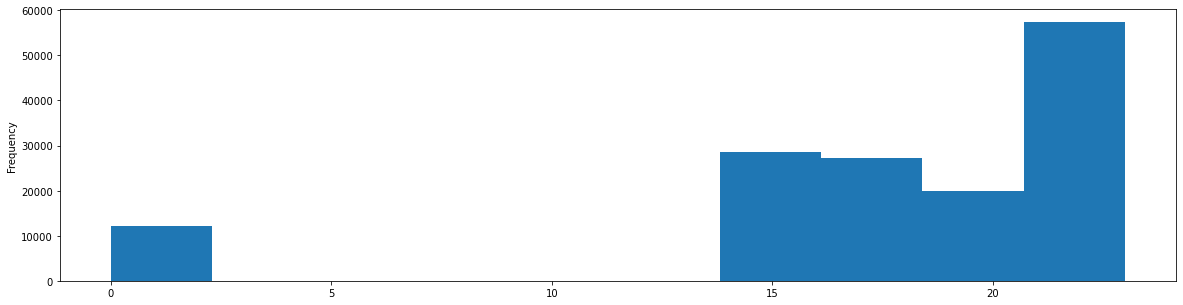

In [191]:
dttime['C-26'].dt.hour.plot(kind='hist',figsize=(20,5))

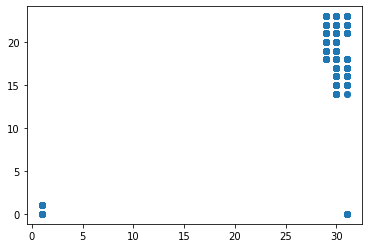

In [192]:
plt.plot(dttime['C-26'].dt.day,dttime['C-26'].dt.hour,'o');

In [193]:
dttime['C-26'].min(),dttime['C-26'].max()

(Timestamp('2014-01-29 18:45:00'), Timestamp('2014-02-01 01:26:00'))

In [194]:
tdiff = dttime['C-26'].max() - dttime['C-26'].min()
tdiff

Timedelta('2 days 06:41:00')

In [195]:
dtdiff = dttime - dttime['C-26'].min()

In [196]:
dtdiff#.dropna()

,C-9,C-10,C-11,C-12,C-13,C-14,C-15,C-16,C-17,C-18,C-19,C-20,C-21,C-22,C-26,C-29
ID,,,,,,,,,,,,,,,,
2,NaT,-814 days +05:15:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,0 days 02:31:00,-814 days +07:15:00
4,-513 days +05:15:00,-812 days +05:15:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2 days 05:26:00,-485 days +07:15:00
5,NaT,-779 days +05:15:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,0 days 20:26:00,-779 days +07:15:00
7,NaT,-1225 days +05:15:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2 days 05:22:00,-455 days +07:15:00
8,NaT,-838 days +05:15:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,0 days 00:46:00,-838 days +07:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290457,-624 days +05:15:00,-1374 days +05:15:00,NaT,NaT,NaT,NaT,-1201 days +05:15:00,-601 days +05:15:00,-792 days +05:15:00,-624 days +05:15:00,-1201 days +05:15:00,-601 days +05:15:00,-792 days +05:15:00,-624 days +05:15:00,1 days 21:51:00,-572 days +07:15:00
290458,-618 days +05:15:00,-1865 days +05:15:00,-858 days +05:15:00,NaT,NaT,-858 days +05:15:00,-1479 days +05:15:00,NaT,-1161 days +05:15:00,-1479 days +05:15:00,-1479 days +05:15:00,NaT,-1161 days +05:15:00,-858 days +05:15:00,1 days 04:38:00,-616 days +07:15:00
290459,-633 days +05:15:00,-793 days +05:15:00,-633 days +05:15:00,NaT,-576 days +05:15:00,-569 days +05:15:00,-644 days +05:15:00,NaT,-606 days +05:15:00,-644 days +05:15:00,-644 days +05:15:00,NaT,-576 days +05:15:00,-569 days +05:15:00,2 days 02:25:00,-527 days +07:15:00


In [197]:
dtdiff['C-26']

ID
2        0 days 02:31:00
4        2 days 05:26:00
5        0 days 20:26:00
7        2 days 05:22:00
8        0 days 00:46:00
               ...      
290457   1 days 21:51:00
290458   1 days 04:38:00
290459   2 days 02:25:00
290461   1 days 03:49:00
290463   2 days 04:26:00
Name: C-26, Length: 145175, dtype: timedelta64[ns]

In [198]:
dtdiff['C-26'].dt.seconds

ID
2          9060
4         19560
5         73560
7         19320
8          2760
          ...  
290457    78660
290458    16680
290459     8700
290461    13740
290463    15960
Name: C-26, Length: 145175, dtype: int64

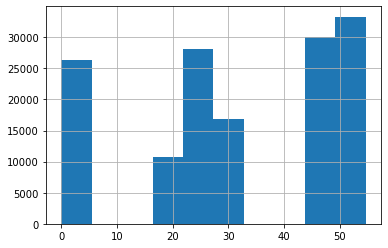

In [199]:
(dtdiff['C-26']/np.timedelta64(1, 'h')).hist();

In [200]:
dtdiff['C-26']/np.timedelta64(1, 'h')

ID
2          2.516667
4         53.433333
5         20.433333
7         53.366667
8          0.766667
            ...    
290457    45.850000
290458    28.633333
290459    50.416667
290461    27.816667
290463    52.433333
Name: C-26, Length: 145175, dtype: float64

In [201]:
mypad = pd.concat(( dtdiff['C-26']/np.timedelta64(1, 'h'),y),axis=1)
mypad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145231 entries, 2 to 290463
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   C-26    145175 non-null  float64
 1   target  145231 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 3.3 MB


In [202]:
np.linspace(0,60,61)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60.])

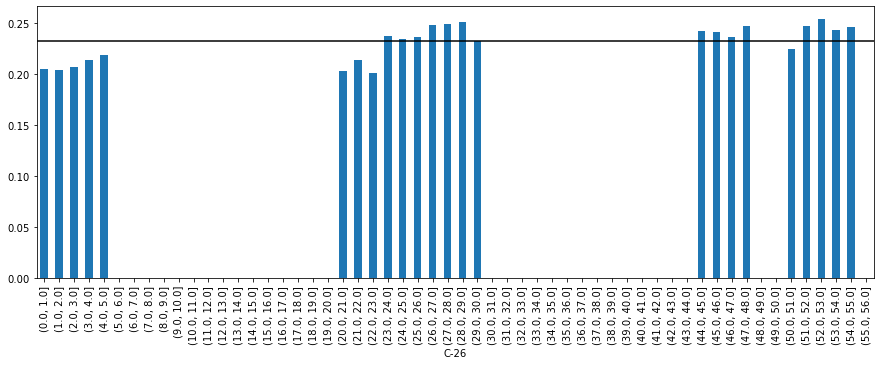

In [203]:
mypad = pd.concat(( dtdiff['C-26']/np.timedelta64(1, 'h'),y),axis=1)
bins = pd.cut(mypad['C-26'], np.linspace(0,56,57))

mypad.groupby(bins)['target'].mean().plot(kind='bar',figsize=(15,5));
plt.hlines(mypad['target'].mean(),-1,60);

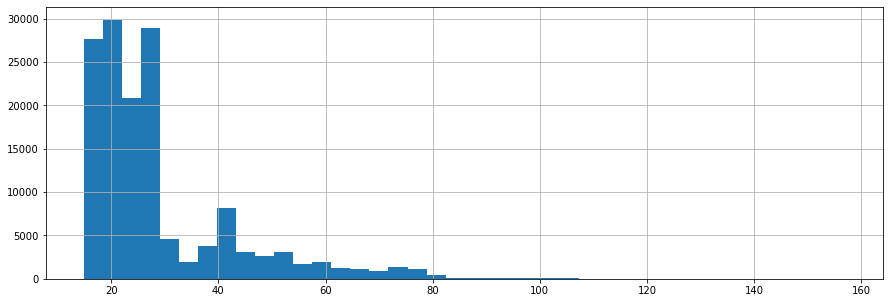

In [204]:
mypad = pd.concat(( dtdiff['C-10']/np.timedelta64(1, 'M')*-1,y),axis=1)
mypad['C-10'].hist(bins=40,figsize=(15,5));

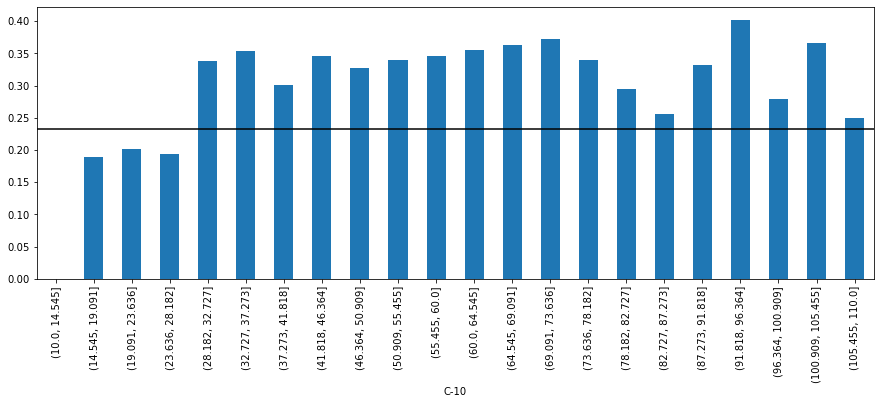

In [205]:
bins = pd.cut(mypad['C-10'], np.linspace(10,110,23))

mypad.groupby(bins)['target'].mean().plot(kind='bar',figsize=(15,5));
plt.hlines(mypad['target'].mean(),-1,110);

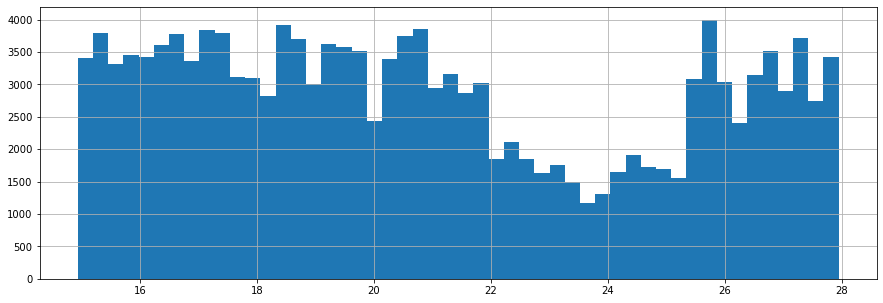

In [206]:
mypad = pd.concat(( dtdiff['C-29']/np.timedelta64(1, 'M')*-1,y),axis=1)
mypad['C-29'].hist(bins=50,figsize=(15,5));

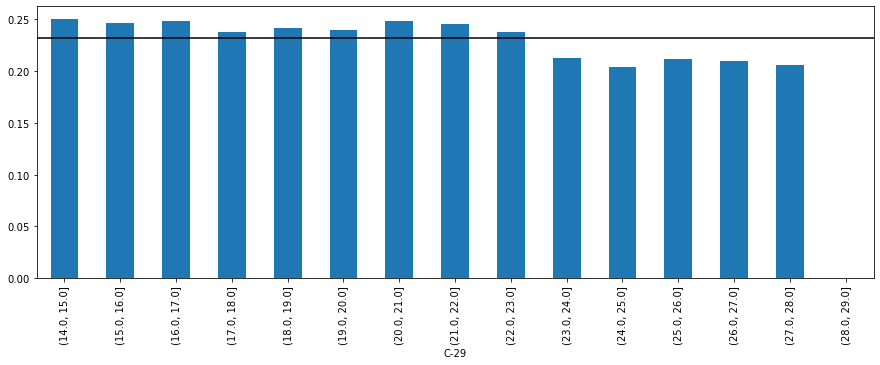

In [207]:
bins = pd.cut(mypad['C-29'], np.linspace(14,29,16))

mypad.groupby(bins)['target'].mean().plot(kind='bar',figsize=(15,5));
plt.hlines(mypad['target'].mean(),-1,60);

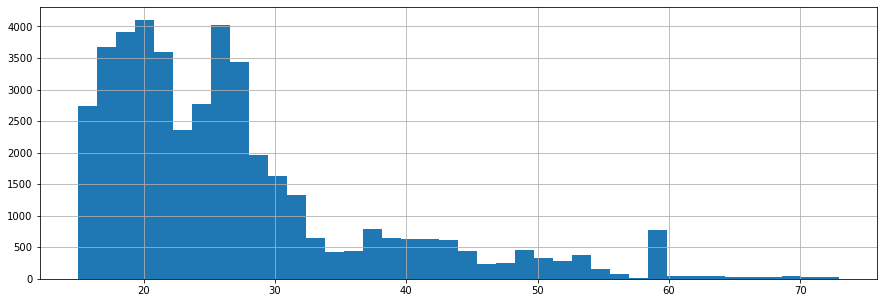

In [208]:
# most significant
mypad = pd.concat(( dtdiff['C-9']/np.timedelta64(1, 'M')*-1,y),axis=1)
mypad['C-9'].hist(bins=40,figsize=(15,5));

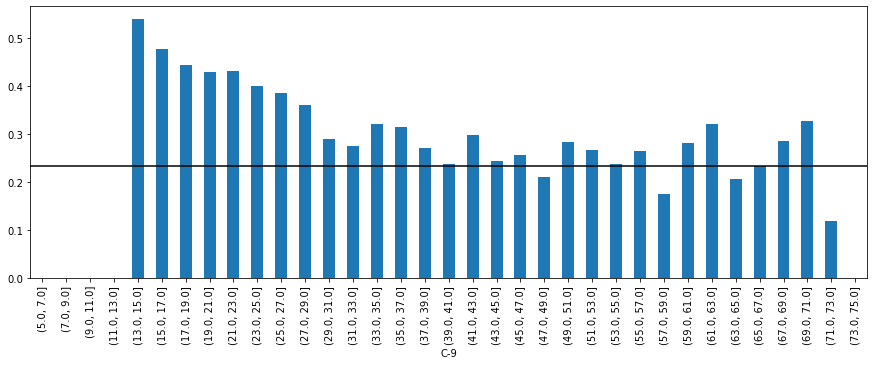

In [209]:
bins = pd.cut(mypad['C-9'], np.linspace(5,75,36))

mypad.groupby(bins)['target'].mean().plot(kind='bar',figsize=(15,5));
plt.hlines(mypad['target'].mean(),-1,70);

In [210]:
dtredu = dtdiff.drop(['C-10','C-26','C-29'],axis=1).drop('C-9',axis=1).dropna(how='all')
dtredu.head(20)

,C-11,C-12,C-13,C-14,C-15,C-16,C-17,C-18,C-19,C-20,C-21,C-22
ID,,,,,,,,,,,,
21,NaT,NaT,NaT,NaT,-689 days +05:15:00,NaT,-679 days +05:15:00,-689 days +05:15:00,-689 days +05:15:00,NaT,-679 days +05:15:00,-689 days +05:15:00
25,NaT,NaT,NaT,NaT,-705 days +05:15:00,NaT,NaT,-705 days +05:15:00,-705 days +05:15:00,NaT,NaT,-705 days +05:15:00
51,-931 days +05:15:00,NaT,NaT,-931 days +05:15:00,NaT,NaT,NaT,NaT,-931 days +05:15:00,NaT,NaT,-931 days +05:15:00
63,NaT,NaT,NaT,NaT,-770 days +05:15:00,NaT,-735 days +05:15:00,-748 days +05:15:00,-770 days +05:15:00,NaT,-735 days +05:15:00,-748 days +05:15:00
69,-801 days +05:15:00,NaT,NaT,-801 days +05:15:00,-1514 days +05:15:00,NaT,-892 days +05:15:00,-876 days +05:15:00,-1514 days +05:15:00,NaT,-892 days +05:15:00,-801 days +05:15:00
78,NaT,NaT,NaT,NaT,-2898 days +05:15:00,NaT,-2834 days +05:15:00,-2898 days +05:15:00,-2898 days +05:15:00,NaT,-2834 days +05:15:00,-2898 days +05:15:00
79,NaT,NaT,NaT,NaT,-654 days +05:15:00,-600 days +05:15:00,-615 days +05:15:00,-615 days +05:15:00,-654 days +05:15:00,-600 days +05:15:00,-615 days +05:15:00,-615 days +05:15:00
84,NaT,NaT,NaT,NaT,-2299 days +05:15:00,NaT,-1652 days +05:15:00,-1835 days +05:15:00,-2299 days +05:15:00,NaT,-1652 days +05:15:00,-1835 days +05:15:00
107,-657 days +05:15:00,NaT,NaT,-657 days +05:15:00,NaT,NaT,NaT,NaT,-657 days +05:15:00,NaT,NaT,-657 days +05:15:00


In [211]:
mypad = pd.concat((dtredu.notna().sum(axis=1),y),axis=1)
mypad = mypad.fillna(0)
mypad.head()

,0,target
ID,,
2,0.0,0
4,0.0,0
5,0.0,0
7,0.0,0
8,0.0,1


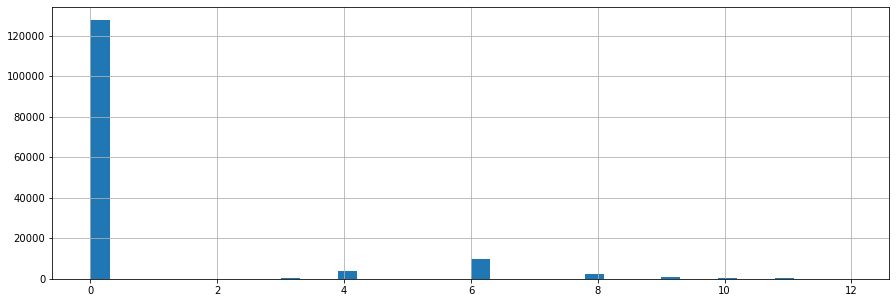

In [212]:
mypad[0].hist(bins=40,figsize=(15,5));

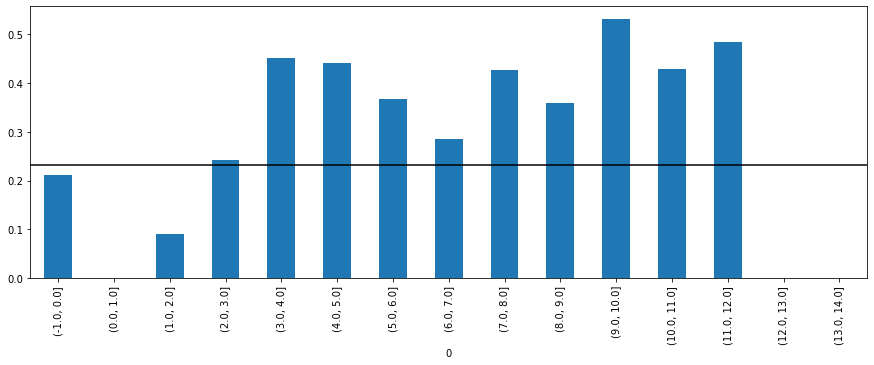

In [213]:
bins = pd.cut(mypad[0], np.linspace(-1,14,16))

mypad.groupby(bins)['target'].mean().plot(kind='bar',figsize=(15,5));
plt.hlines(mypad['target'].mean(),-1,16);

In [214]:
cols_dt = left.columns

# dttime = pd.to_datetime(dfc[left.columns].stack(),format='%d%b%y:%H:%M:%S').unstack()
# dtdiff = dttime - dttime['C-26'].min()

for col in cols_dt:
    
    col_new = col.replace('C','T') + "_diff"
    print(col_new)

#    t = t.drop(col_new,axis=1)
#    continue
    
    if col_new == "T-26_diff":
        
        t[col_new] = dtdiff[col]/np.timedelta64(1, 'h')
    else:
        
        t[col_new] = dtdiff[col]/np.timedelta64(1, 'M')*-1
        

T-9_diff
T-10_diff
T-11_diff
T-12_diff
T-13_diff
T-14_diff
T-15_diff
T-16_diff
T-17_diff
T-18_diff
T-19_diff
T-20_diff
T-21_diff
T-22_diff
T-26_diff
T-29_diff


In [215]:
t = t.fillna(0)

In [216]:
t.head()

,C-0,C-1,C-50,C-2,C-31,C-33,C-34,C-35,C-47,C-43,C-44,C-45,C-48,C-39,C-40,C-41,C-27,C-42,C-36,C-38,C-46,C-49,F-CITY-POPU,F-CITY-DENS,F-STATE,F-43-44-45-nO,F-43-44-45-nR,F-43-44-45-nU,F-39-40-41-nU,F-39-40-41-nH,F-39-40-41-nR,F-39-40-41-nF,F-39-40-41-nM,F-39-40-41-nG,F-39-40-41-nP,F-39-40-41-nS,T-9_diff,T-10_diff,T-11_diff,T-12_diff,T-13_diff,T-14_diff,T-15_diff,T-16_diff,T-17_diff,T-18_diff,T-19_diff,T-20_diff,T-21_diff,T-22_diff,T-26_diff,T-29_diff
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0,1,2,1.0,1.0,1.0,2.0,2.0,1.0,2,4,2,1,7,7,0,0.0,21,10,11,0,0,106306,1175.0,1,2,0,1,0,0,0,0,0,0,0,2,0.000000,26.736689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.516667,26.733951
4,0,0,2,1.0,1.0,1.0,1.0,2.0,2.0,2,3,3,3,7,7,3,0.0,32,5,25,0,0,3220118,1686.0,0,1,2,0,0,1,0,0,0,0,0,2,16.847369,26.670979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.433333,15.924694
5,0,1,2,1.0,1.0,1.0,2.0,2.0,1.0,3,3,1,1,7,5,6,0.0,50,45,55,0,0,604,359.0,1,0,2,0,0,0,1,0,0,0,1,1,0.000000,25.586768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.433333,25.584030
7,0,1,4,1.0,1.0,1.0,1.0,2.0,1.0,3,3,1,1,7,5,3,0.0,1,40,49,0,0,6435,80.0,1,0,2,0,0,1,0,0,0,0,1,1,0.000000,40.240046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.366667,14.939047
8,2,2,0,1.0,1.0,1.0,2.0,2.0,1.0,3,4,2,1,7,5,7,0.0,1,15,17,0,0,19448,807.0,1,1,1,1,0,0,0,0,0,0,1,2,0.000000,27.525206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.766667,27.522468


In [217]:
X_train, X_test, y_train, y_test = train_test_split(t, y, test_size=0.25, random_state=111)

rf = RandomForestClassifier(random_state=222)
rf.get_params()

#rf_cv = cross_validate(rf,X_train, y_train,scoring='roc_auc', cv = 3, verbose=2, n_jobs = -1)
#print(rf_cv)
#print("\n Test Score = ",round(np.mean(rf_cv['test_score']),3))

param_grid = {'n_estimators': [100],
              'max_depth': [10],
#              'bootstrap': [True, False]
             }
   
#rf_cv = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter = 100,
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='roc_auc', cv = 5, verbose=2, n_jobs = -1)
#                           scoring='recall', cv = 5, verbose=2, n_jobs = -1)
rf_cv.fit(X_train,y_train)

print("Best Parameters:",rf_cv.best_params_)
print("Best Score:",round(rf_cv.best_score_,4),'\n')

y_pred = rf_cv.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['RF 0','RF 1']))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.0s remaining:   25.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.8s finished


Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best Score: 0.6788 

              precision    recall  f1-score   support

        RF 0       0.77      0.99      0.87     27856
        RF 1       0.60      0.03      0.05      8452

    accuracy                           0.77     36308
   macro avg       0.68      0.51      0.46     36308
weighted avg       0.73      0.77      0.68     36308



[[27695   161]
 [ 8215   237]]


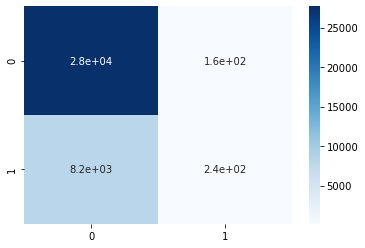

In [218]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm,annot=True,cmap='Blues');

In [219]:
t

,C-0,C-1,C-50,C-2,C-31,C-33,C-34,C-35,C-47,C-43,C-44,C-45,C-48,C-39,C-40,C-41,C-27,C-42,C-36,C-38,C-46,C-49,F-CITY-POPU,F-CITY-DENS,F-STATE,F-43-44-45-nO,F-43-44-45-nR,F-43-44-45-nU,F-39-40-41-nU,F-39-40-41-nH,F-39-40-41-nR,F-39-40-41-nF,F-39-40-41-nM,F-39-40-41-nG,F-39-40-41-nP,F-39-40-41-nS,T-9_diff,T-10_diff,T-11_diff,T-12_diff,T-13_diff,T-14_diff,T-15_diff,T-16_diff,T-17_diff,T-18_diff,T-19_diff,T-20_diff,T-21_diff,T-22_diff,T-26_diff,T-29_diff
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0,1,2,1.0,1.0,1.0,2.0,2.0,1.0,2,4,2,1,7,7,0,0.0,21,10,11,0,0,106306,1175.0,1,2,0,1,0,0,0,0,0,0,0,2,0.000000,26.736689,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.516667,26.733951
4,0,0,2,1.0,1.0,1.0,1.0,2.0,2.0,2,3,3,3,7,7,3,0.0,32,5,25,0,0,3220118,1686.0,0,1,2,0,0,1,0,0,0,0,0,2,16.847369,26.670979,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.433333,15.924694
5,0,1,2,1.0,1.0,1.0,2.0,2.0,1.0,3,3,1,1,7,5,6,0.0,50,45,55,0,0,604,359.0,1,0,2,0,0,0,1,0,0,0,1,1,0.000000,25.586768,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.433333,25.584030
7,0,1,4,1.0,1.0,1.0,1.0,2.0,1.0,3,3,1,1,7,5,3,0.0,1,40,49,0,0,6435,80.0,1,0,2,0,0,1,0,0,0,0,1,1,0.000000,40.240046,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.366667,14.939047
8,2,2,0,1.0,1.0,1.0,2.0,2.0,1.0,3,4,2,1,7,5,7,0.0,1,15,17,0,0,19448,807.0,1,1,1,1,0,0,0,0,0,0,1,2,0.000000,27.525206,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.766667,27.522468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290457,0,1,0,1.0,1.0,1.0,1.0,2.0,1.0,3,4,3,1,7,3,7,0.0,1,19,21,0,0,264357,877.0,1,0,2,1,0,1,0,0,0,0,0,2,20.494261,45.135424,0.000000,0.0,0.000000,0.000000,39.451529,19.738598,26.013881,20.494261,39.451529,19.738598,26.013881,20.494261,45.850000,18.783069
290458,2,1,2,1.0,1.0,1.0,1.0,2.0,2.0,3,4,3,3,3,3,7,0.0,13,5,5,0,0,59329,3929.0,1,0,2,1,0,2,0,0,0,0,0,1,20.297131,61.267172,28.182304,0.0,0.000000,28.182304,48.585187,0.000000,38.137333,48.585187,48.585187,0.000000,38.137333,28.182304,28.633333,20.228684
290459,2,0,0,1.0,1.0,1.0,1.0,2.0,1.0,4,3,1,1,7,7,5,0.0,18,5,5,0,0,47450,2606.0,1,0,1,1,0,0,0,0,0,0,1,2,20.789955,26.046736,20.789955,0.0,18.917226,18.687242,21.151358,0.000000,19.902873,21.151358,21.151358,0.000000,18.917226,18.687242,50.416667,17.304599


In [220]:
dtdiff.head()

,C-9,C-10,C-11,C-12,C-13,C-14,C-15,C-16,C-17,C-18,C-19,C-20,C-21,C-22,C-26,C-29
ID,,,,,,,,,,,,,,,,
2,NaT,-814 days +05:15:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,0 days 02:31:00,-814 days +07:15:00
4,-513 days +05:15:00,-812 days +05:15:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2 days 05:26:00,-485 days +07:15:00
5,NaT,-779 days +05:15:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,0 days 20:26:00,-779 days +07:15:00
7,NaT,-1225 days +05:15:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2 days 05:22:00,-455 days +07:15:00
8,NaT,-838 days +05:15:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,0 days 00:46:00,-838 days +07:15:00


In [221]:
cols_dt_full = ['C-10','C-26','C-29']

t['T-n-scarse'] = dtdiff.drop(cols_dt_full,axis=1).notna().sum(axis=1)

In [222]:
t = t.fillna(0)

In [223]:
t

,C-0,C-1,C-50,C-2,C-31,C-33,C-34,C-35,C-47,C-43,C-44,C-45,C-48,C-39,C-40,C-41,C-27,C-42,C-36,C-38,C-46,C-49,F-CITY-POPU,F-CITY-DENS,F-STATE,F-43-44-45-nO,F-43-44-45-nR,F-43-44-45-nU,F-39-40-41-nU,F-39-40-41-nH,F-39-40-41-nR,F-39-40-41-nF,F-39-40-41-nM,F-39-40-41-nG,F-39-40-41-nP,F-39-40-41-nS,T-9_diff,T-10_diff,T-11_diff,T-12_diff,T-13_diff,T-14_diff,T-15_diff,T-16_diff,T-17_diff,T-18_diff,T-19_diff,T-20_diff,T-21_diff,T-22_diff,T-26_diff,T-29_diff,T-n-scarse
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0,1,2,1.0,1.0,1.0,2.0,2.0,1.0,2,4,2,1,7,7,0,0.0,21,10,11,0,0,106306,1175.0,1,2,0,1,0,0,0,0,0,0,0,2,0.000000,26.736689,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.516667,26.733951,0.0
4,0,0,2,1.0,1.0,1.0,1.0,2.0,2.0,2,3,3,3,7,7,3,0.0,32,5,25,0,0,3220118,1686.0,0,1,2,0,0,1,0,0,0,0,0,2,16.847369,26.670979,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.433333,15.924694,1.0
5,0,1,2,1.0,1.0,1.0,2.0,2.0,1.0,3,3,1,1,7,5,6,0.0,50,45,55,0,0,604,359.0,1,0,2,0,0,0,1,0,0,0,1,1,0.000000,25.586768,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.433333,25.584030,0.0
7,0,1,4,1.0,1.0,1.0,1.0,2.0,1.0,3,3,1,1,7,5,3,0.0,1,40,49,0,0,6435,80.0,1,0,2,0,0,1,0,0,0,0,1,1,0.000000,40.240046,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.366667,14.939047,0.0
8,2,2,0,1.0,1.0,1.0,2.0,2.0,1.0,3,4,2,1,7,5,7,0.0,1,15,17,0,0,19448,807.0,1,1,1,1,0,0,0,0,0,0,1,2,0.000000,27.525206,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.766667,27.522468,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290457,0,1,0,1.0,1.0,1.0,1.0,2.0,1.0,3,4,3,1,7,3,7,0.0,1,19,21,0,0,264357,877.0,1,0,2,1,0,1,0,0,0,0,0,2,20.494261,45.135424,0.000000,0.0,0.000000,0.000000,39.451529,19.738598,26.013881,20.494261,39.451529,19.738598,26.013881,20.494261,45.850000,18.783069,9.0
290458,2,1,2,1.0,1.0,1.0,1.0,2.0,2.0,3,4,3,3,3,3,7,0.0,13,5,5,0,0,59329,3929.0,1,0,2,1,0,2,0,0,0,0,0,1,20.297131,61.267172,28.182304,0.0,0.000000,28.182304,48.585187,0.000000,38.137333,48.585187,48.585187,0.000000,38.137333,28.182304,28.633333,20.228684,9.0
290459,2,0,0,1.0,1.0,1.0,1.0,2.0,1.0,4,3,1,1,7,7,5,0.0,18,5,5,0,0,47450,2606.0,1,0,1,1,0,0,0,0,0,0,1,2,20.789955,26.046736,20.789955,0.0,18.917226,18.687242,21.151358,0.000000,19.902873,21.151358,21.151358,0.000000,18.917226,18.687242,50.416667,17.304599,10.0


In [224]:
X_train, X_test, y_train, y_test = train_test_split(t, y, test_size=0.25, random_state=111)

rf = RandomForestClassifier(random_state=222)
rf.get_params()

#rf_cv = cross_validate(rf,X_train, y_train,scoring='roc_auc', cv = 3, verbose=2, n_jobs = -1)
#print(rf_cv)
#print("\n Test Score = ",round(np.mean(rf_cv['test_score']),3))

param_grid = {'n_estimators': [100],
              'max_depth': [10],
#              'bootstrap': [True, False]
             }
   
#rf_cv = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter = 100,
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='roc_auc', cv = 5, verbose=2, n_jobs = -1)
#                           scoring='recall', cv = 5, verbose=2, n_jobs = -1)
rf_cv.fit(X_train,y_train)

print("Best Parameters:",rf_cv.best_params_)
print("Best Score:",round(rf_cv.best_score_,4),'\n')

y_pred = rf_cv.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['RF 0','RF 1']))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.0s remaining:   21.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.0s finished


Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best Score: 0.6794 

              precision    recall  f1-score   support

        RF 0       0.77      0.99      0.87     27856
        RF 1       0.58      0.03      0.05      8452

    accuracy                           0.77     36308
   macro avg       0.67      0.51      0.46     36308
weighted avg       0.73      0.77      0.68     36308



[[27700   156]
 [ 8240   212]]


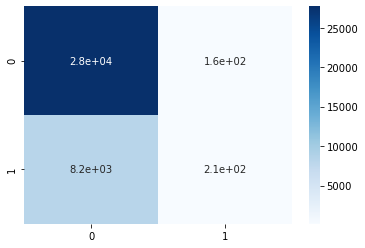

In [225]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm,annot=True,cmap='Blues');

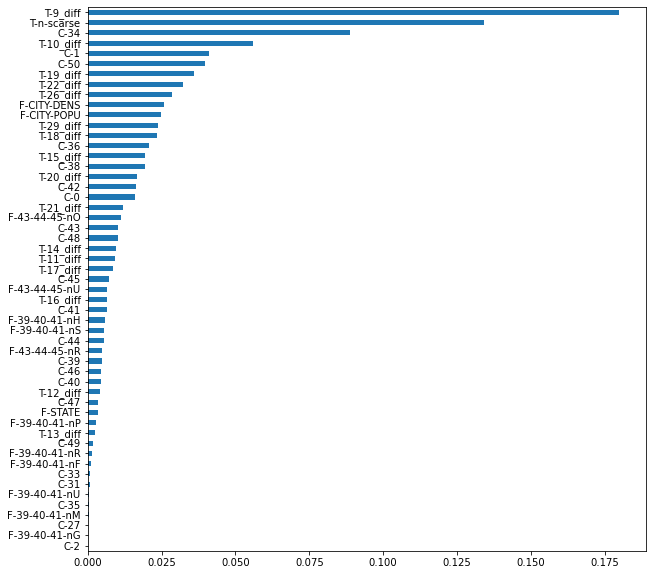

In [226]:
rf_feature_importance = pd.Series(rf_cv.best_estimator_.feature_importances_, index=t.columns)
rf_feature_importance.sort_values().plot(kind='barh',figsize=(10,10));

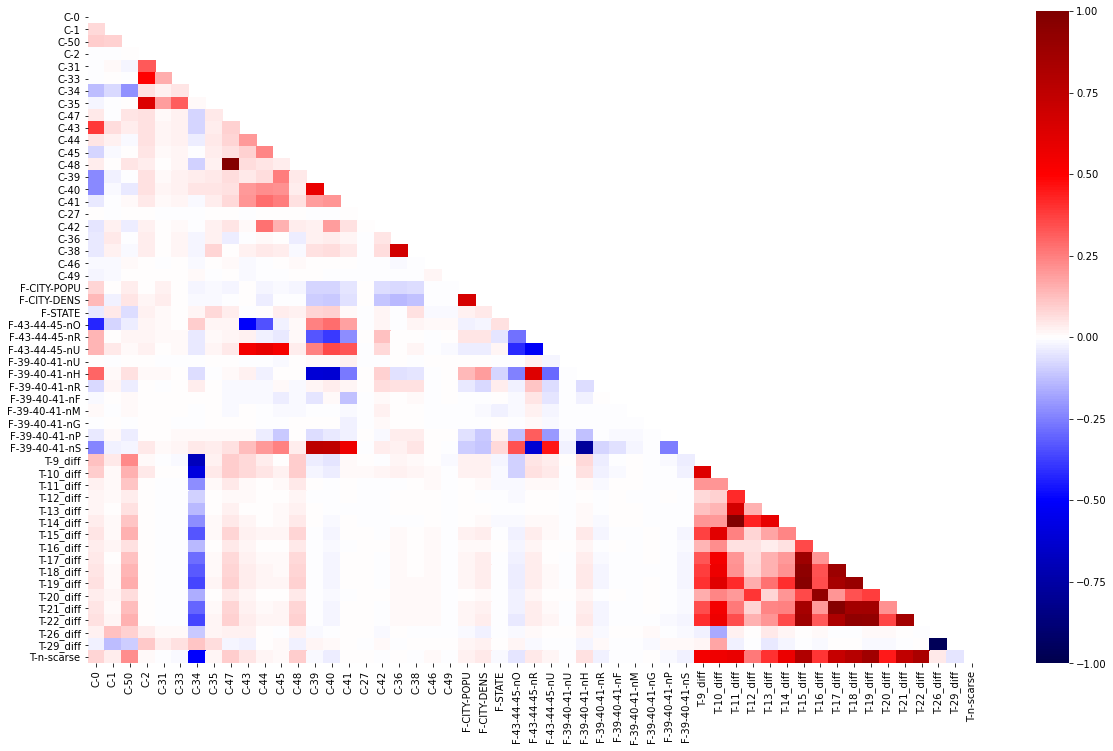

In [227]:
cm = t.corr()
f, ax = plt.subplots(figsize=(20, 12))

mask = np.triu(np.ones_like(cm, dtype=bool))

sns.heatmap(cm,mask=mask,cmap='seismic',center=0,vmin=-1.,vmax=1)#,annot=True);#,linewidths=.005);#,vmin=0.97);

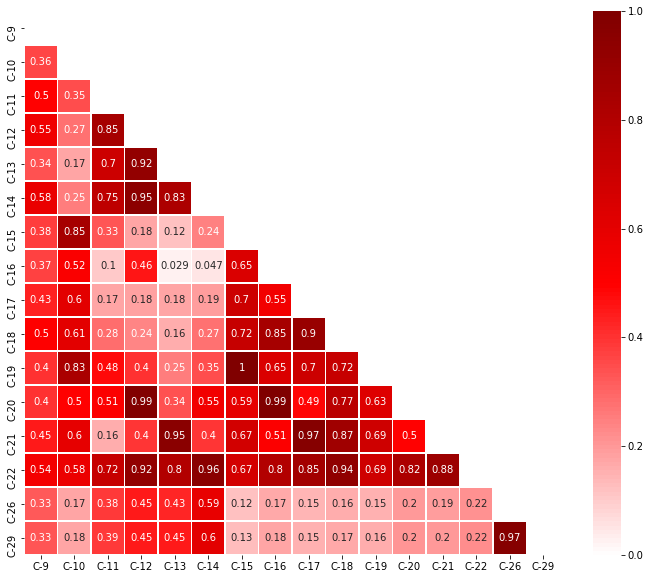

In [228]:
diff=dtdiff/np.timedelta64(1, 'M')
cm = diff.corr()
#cm = t.iloc[:,22:].corr()
f, ax = plt.subplots(figsize=(12, 10))

mask = np.triu(np.ones_like(cm, dtype=bool))

# bwr or seismic
ax = sns.heatmap(cm,mask=mask,linewidths=.5,cmap='seismic',center=0,vmin=0.,vmax=1,annot=True);#,vmin=0.97);
#ax.xaxis.tick_top()

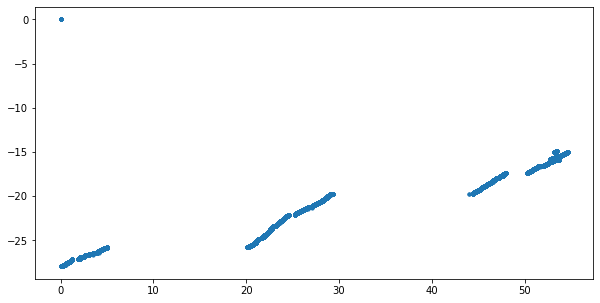

In [229]:
plt.figure(figsize=(10,5))
plt.scatter(t['T-26_diff'],-1*t['T-29_diff'],s=10);
#plt.xlim(-10000,200_000)
#plt.ylim(-1000,10_000)

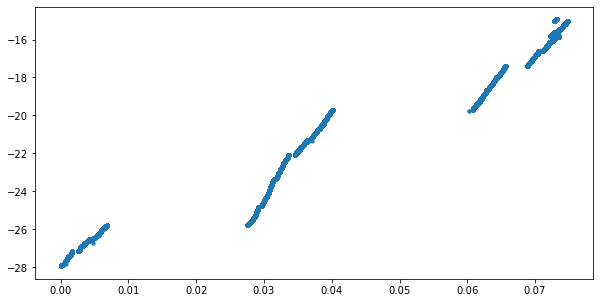

In [230]:
plt.figure(figsize=(10,5))
plt.scatter(diff['C-26'],diff['C-29'],s=10);
#plt.xlim(-10000,200_000)
#plt.ylim(-1000,10_000)

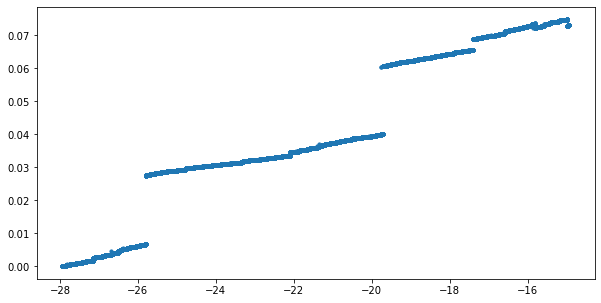

In [231]:
plt.figure(figsize=(10,5))
plt.scatter(diff['C-29'],diff['C-26'],s=10);
#plt.xlim(-10000,200_000)
#plt.ylim(-1000,10_000)

In [232]:
stop here

SyntaxError: invalid syntax (<ipython-input-232-a96ba3aab008>, line 1)

### 1. 3 Columns with no missing values

In [ ]:
nuni = {}

for col in dfc.columns:
    
    nuni[col] = dfc[col].nunique(dropna=False)

nu = list(nuni.values())

#nu = stats.n_unique.values
#--------    

plt.figure(figsize=(10,5))

hist, bins= np.histogram(nu, bins=100)
logbins = np.logspace(np.log10(1),np.log10(bins[-1]),len(bins))

plt.hist(nu, bins=logbins)
plt.xscale('log')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Unique values per feature (strings)",fontsize=15)
plt.xlabel("Number of feature's unique values",fontsize=15)
plt.ylabel("Number of features",fontsize=15)
plt.show()

In [ ]:
s2 = []
sX = []
sXX = []
sXXX = []
sXXXX = []

for k,val in nuni.items():
    
    if(val == 2):      s2.append(k)
    elif (val < 15):   sX.append(k)
    elif (val < 100):  sXX.append(k)
    elif (val < 5000): sXXX.append(k)
    else:              sXXXX.append(k)

### 1.1 Features with two unique values

In [ ]:
for col in s2:
    print(dfc[col].value_counts(dropna=False),'\n ---')

In [ ]:
for col in sX:
    print(dfc[col].value_counts(dropna=False),'\n ---')

In [ ]:
for col in sXX:
    print(dfc[col].value_counts(dropna=False),'\n ---')

In [ ]:
dfc[s2][dfc['C-2'] != False]

In [ ]:
#v = dfc['C-2'][dfc['C-2'] != False].values
#print(type(v[0]),v[0])
# False is bool, Nan is float

In [ ]:
fe_1 = dfc['C-2'].replace(False,0)
fe_1 = fe_1.replace(np.nan,1)

fe_1.value_counts()

### 1.2 Features with less than 15 unique values

In [ ]:
for col in sX:
    print(dfc[col].value_counts(dropna=False),'\n ---')

In [ ]:
for col in sXX:
    print(dfc[col].value_counts(dropna=False),'\n ---')

In [ ]:
a = ds.groupby('C-36').agg(['mean','count']).sort_values(by=('target','mean'))
print(a.tail(5))

a.iloc[:,0].plot(kind='bar',figsize=(20,5))
plt.hlines(ds['target'].mean(),-1,50);

In [ ]:
a.iloc[:,1].plot(kind='bar',figsize=(20,5));

In [ ]:
b = ds.groupby('C-38').agg(['mean','count']).sort_values(by=('target','mean'))
print(b.tail(5))

b.iloc[:,0].plot(kind='bar',figsize=(20,5))
plt.hlines(ds['target'].mean(),-1,60);

In [ ]:
b.iloc[:,1].plot(kind='bar',figsize=(20,5));

In [ ]:
ds.groupby('C-38')['target'].count().sort_values().plot(kind='bar',figsize=(20,5));

In [ ]:
job = pd.concat((dfc[['C-46','C-49']],y),axis=1)

#job.groupby('C-46')['target'].mean().sort_values().plot(kind='bar',figsize=(20,5));
a = job.groupby('C-46').agg(['mean','count']).sort_values(by=('target','mean'))

a.iloc[:,0].plot(kind='bar',figsize=(20,5))
plt.hlines(ds['target'].mean(),-1,12000);

In [ ]:
a.iloc[:,1].plot(kind='bar',log=True,figsize=(20,5));

In [ ]:
job.groupby('C-46')['target'].count().sort_values()#.plot(kind='bar',figsize=(20,5));

In [ ]:
job.groupby('C-49')['target'].mean().sort_values().plot(kind='bar',figsize=(20,5));

In [ ]:
job.groupby('C-49')['target'].count().sort_values().plot(kind='bar',figsize=(20,5),log=True);